In [238]:
import pandas as pd

In [239]:
import pandas as pd

df_products = pd.read_csv('gs://ba820-bins/BA820_data/productinfo.csv')
df_reviews_1 = pd.read_csv("gs://ba820-bins/BA820_data/reviews0-250.csv")
df_reviews_2 = pd.read_csv("gs://ba820-bins/BA820_data/reviews250-500.csv")
df_reviews_3 = pd.read_csv("gs://ba820-bins/BA820_data/reviews500-750.csv")
df_reviews_4 = pd.read_csv("gs://ba820-bins/BA820_data/reviews750-1250.csv")
df_reviews_5 = pd.read_csv("gs://ba820-bins/BA820_data/reviews1250-end.csv")

/var/tmp/ipykernel_4017/1617597207.py:4: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.

/var/tmp/ipykernel_4017/1617597207.py:7: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.

/var/tmp/ipykernel_4017/1617597207.py:8: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



In [240]:
df_products.head()

product_id               product_name  brand_id brand_name  loves_count  \
0    P473671    Fragrance Discovery Set      6342      19-69         6320   
1    P473668    La Habana Eau de Parfum      6342      19-69         3827   
2    P473662  Rainbow Bar Eau de Parfum      6342      19-69         3253   
3    P473660       Kasbah Eau de Parfum      6342      19-69         3018   
4    P473658  Purple Haze Eau de Parfum      6342      19-69         2691   

   rating  reviews            size                      variation_type  \
0  3.6364     11.0             NaN                                 NaN   
1  4.1538     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
2  4.2500     16.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
3  4.4762     21.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   
4  3.2308     13.0  3.4 oz/ 100 mL  Size + Concentration + Formulation   

  variation_value  ... online_only out_of_stock  sephora_exclusive  \
0             NaN  ...           1            0                  0   
1  3.4 oz/ 100 mL  ...           1            0                  0   
2  3.4 oz/ 100 mL  ...           1            0                  0   
3  3.4 oz/ 100 mL  ...           1            0                  0   
4  3.4 oz/ 100 mL  ...           1            0                  0   

                                          highlights  primary_category  \
0  ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...         Fragrance   
1  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
2  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
3  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   
4  ['Unisex/ Genderless Scent', 'Layerable Scent'...         Fragrance   

   secondary_category  tertiary_category  child_count  child_max_price  \
0   Value & Gift Sets  Perfume Gift Sets            0              NaN   
1               Women            Perfume            2             85.0   
2               Women            Perfume            2             75.0   
3               Women            Perfume            2             75.0   
4               Women            Perfume            2             75.0   

   child_min_price  
0              NaN  
1             30.0  
2             30.0  
3             30.0  
4             30.0  

[5 rows x 27 columns]

# 1. Data Exploration

In [241]:
df_products['highlights'].unique()

array(["['Unisex/ Genderless Scent', 'Warm &Spicy Scent', 'Woody & Earthy Scent', 'Fresh Scent']",
       "['Unisex/ Genderless Scent', 'Layerable Scent', 'Warm &Spicy Scent']",
       "['Unisex/ Genderless Scent', 'Layerable Scent', 'Woody & Earthy Scent']",
       ...,
       "['Best for Oily, Combo, Normal Skin', 'Without Parabens', 'Without Mineral Oil', 'Matte Finish', 'Salicylic Acid']",
       "['Natural Finish', 'Without Mineral Oil', 'Without Parabens']",
       "['Hyaluronic Acid', 'High Shine Finish', 'Plumping', 'Hydrating', 'Medium Coverage']"],
      dtype=object)

In [242]:
df_products['variation_type'].unique()

array([nan, 'Size + Concentration + Formulation', 'Scent', 'Size',
       'Color', 'Size + Concentration', 'Type', 'Formulation'],
      dtype=object)

In [243]:
df_products['variation_value'].unique()

array([nan, '3.4 oz/ 100 mL', '0.25 oz/ 7.5 mL Eau de Parfum Spray', ...,
       '0.25 oz/ 7.5 ml', '2.6 oz', '2 oz / 60 mL eau de parfum spray'],
      dtype=object)

In [244]:
df_products['size'].unique()

array([nan, '3.4 oz/ 100 mL', '0.25 oz/ 7.5 mL', ..., '0.25 oz/ 7.5 ml',
       '2.6 oz', '.11 oz / 3.2 mL'], dtype=object)

In [245]:
df_reviews = pd.concat([df_reviews_1, df_reviews_2, df_reviews_3, df_reviews_4, df_reviews_5])
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094411 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 982854 n

## 1.1 null values exploration

**PRODUCT TABLE**:
1. drop `sale_price_usd`, `value_price_usd`, `variation_desc`,`child_max_price`, `child_min_price`, `size`, `variation_type`, `variation_value`
2. impute values into `highlights` and `ingredients` with "NA"
3. keep `tertiary_category` for dimensionality reduction? impute with unknown for this + the `secondary_category` nulls too
4. for reviews nulls, check if any reviews exist in the reviews table & count them. Impute with that value, else 0
5. for ratings nulls, impute with the mean or median depending on skewness OR do average of ratings in review table

In [246]:
import numpy as np
np.round((df_products.isna().sum())/len(df_products),2).sort_values(ascending=False)

sale_price_usd        0.97
value_price_usd       0.95
variation_desc        0.85
child_max_price       0.68
child_min_price       0.68
highlights            0.26
size                  0.19
variation_value       0.19
variation_type        0.17
tertiary_category     0.12
ingredients           0.11
rating                0.03
reviews               0.03
sephora_exclusive     0.00
brand_id              0.00
child_count           0.00
secondary_category    0.00
primary_category      0.00
new                   0.00
out_of_stock          0.00
online_only           0.00
limited_edition       0.00
brand_name            0.00
product_name          0.00
price_usd             0.00
loves_count           0.00
product_id            0.00
dtype: float64

In [247]:
null_rows = df_products[df_products['size'].isnull() & df_products['variation_value'].isnull()] #due to similarities between size and variation_value columns, we considered to fill in with overlaps

print(len(null_rows)) #however, teh result shows that most of the rows have missing values in both columns

1333


**REVIEW TABLE**:
1. Drop `helpfulness` due to a significant number of missing values
2.  Drop the `is_recommended` column By analyzing the ratings, we can infer whether a product is likely to be recommended without the explicit need for the is_recommended data point.
2. Replace null review_text and review_title with "NA"
3. Replace skin_tone, eye_color, skin_type, hair_color with "Unknown"

In [248]:
(df_reviews.isna().sum()/len(df_reviews)).sort_values(ascending= False)

helpfulness                 0.513145
review_title                0.283855
hair_color                  0.207206
eye_color                   0.191544
skin_tone                   0.155827
is_recommended              0.153496
skin_type                   0.101933
review_text                 0.001319
brand_name                  0.000000
product_name                0.000000
product_id                  0.000000
Unnamed: 0                  0.000000
author_id                   0.000000
submission_time             0.000000
total_pos_feedback_count    0.000000
total_neg_feedback_count    0.000000
total_feedback_count        0.000000
rating                      0.000000
price_usd                   0.000000
dtype: float64

### 1.1.1 dropping columns with large missing values

In [249]:
df_products = df_products.drop(columns=['value_price_usd', 'sale_price_usd', 'child_max_price', 'child_min_price', 'variation_desc', 'variation_type', 'variation_value', 'size'])

In [250]:
df_reviews = df_reviews.drop(columns=['helpfulness', 'is_recommended', 'Unnamed: 0'])

In [251]:
df_products.shape, df_reviews.shape

((8494, 19), (1094411, 16))

### 1.1.2 null value imputation

**PRODUCT TABLE**

In [252]:
df_products.isna().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
ingredients            945
price_usd                0
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
dtype: int64

Impute missing values in 'highlights' and 'ingredients' columns with 'Unknown'

In [253]:
df_products['highlights'] = df_products['highlights'].fillna('Unknown')
df_products['ingredients'] = df_products['ingredients'].fillna('Unknown')

Impute missing values in 'tertiary_category' and 'secondary_category' columns with 'Unknown'

In [254]:
df_products['tertiary_category'] = df_products['tertiary_category'].fillna('Unknown')
df_products['secondary_category'] = df_products['secondary_category'].fillna('Unknown')

**REVIEW TABLE**

Replace null values in 'review_text' and 'review_title' with Unknown'

In [255]:
df_reviews['review_text'] = df_reviews['review_text'].fillna('Unknown')
df_reviews['review_title'] = df_reviews['review_title'].fillna('Unknown')

Replace null values in 'skin_tone', 'eye_color', 'skin_type', and 'hair_color' with 'Unknown'

In [256]:
df_reviews['skin_tone'] = df_reviews['skin_tone'].fillna('Unknown')
df_reviews['eye_color'] = df_reviews['eye_color'].fillna('Unknown')
df_reviews['skin_type'] = df_reviews['skin_type'].fillna('Unknown')
df_reviews['hair_color'] = df_reviews['hair_color'].fillna('Unknown')

Count the number of rows with null 'reviews' in df_products

In [257]:
df_products[df_products['reviews'].isna()].shape[0]

278

Update the `reviews` column in df_products with the actual count of reviews if available, or impute it with 0 if no reviews are found. Iterated over rows in the df_products where the reviews column is null, identifying each product by its ID, and counting corresponding reviews in the df_reviews.

In [258]:
null_reviews = df_products[df_products['reviews'].isna()]
null_reviews.head()

product_id                                   product_name  brand_id  \
42    P471525                        Arancia di Capri Candle      5847   
60    P473154    Mini Baomint Moisturizing Curl Defining Gel      6321   
61    P473153  Mini Baomint Moisturizing Curl Defining Cream      6321   
62    P473152      Mini Baomint Leave-In Conditioning Styler      6321   
63    P473155              Mini Baomint Moisturizing Shampoo      6321   

        brand_name  loves_count  rating  reviews  \
42  Acqua di Parma          601     NaN      NaN   
60    adwoa beauty            0     NaN      NaN   
61    adwoa beauty            0     NaN      NaN   
62    adwoa beauty            0     NaN      NaN   
63    adwoa beauty            0     NaN      NaN   

                                          ingredients  price_usd  \
42                                            Unknown       82.0   
60  ['Water (Aqua), Glycerin, Prunus Amygdalus Dul...       14.0   
61  ['Water (Aqua), Behentrimonium Methosulfate, C...       14.0   
62  ['Water (Aqua), Behentrimonium Methosulfate, C...       13.0   
63  ['Water (Aqua), Aloe Barbadensis Leaf Juice, C...       12.0   

    limited_edition  new  online_only  out_of_stock  sephora_exclusive  \
42                0    0            1             0                  0   
60                0    0            0             0                  1   
61                0    0            1             0                  1   
62                0    0            1             0                  1   
63                0    0            1             0                  1   

                                           highlights primary_category  \
42                                            Unknown        Fragrance   
60  ['allure 2020 Best of Beauty Award Winner', 'C...             Hair   
61  ['Clean at Sephora', 'Good for: Volume', 'All ...             Hair   
62  ['Clean at Sephora', 'All Hair Types', 'Curl-E...             Hair   
63  ['Unisex/ Genderless Scent', 'Clean at Sephora...             Hair   

       secondary_category tertiary_category  child_count  
42  Candles & Home Scents           Candles            0  
60              Mini Size           Unknown            0  
61              Mini Size           Unknown            0  
62              Mini Size           Unknown            0  
63              Mini Size           Unknown            0

In [259]:
for idx, product_row in null_reviews.iterrows():
    product_id = product_row['product_id']
    # Count the number of reviews for those products in df_reviews
    review_count = df_reviews[df_reviews['product_id'] == product_id].shape[0]
    # Update df_products with the count or 0 if no reviews exist
    df_products.at[idx, 'reviews'] = review_count if review_count > 0 else 0

## 1.2 Pre-processing

### 1.2.1 Rating


Measure the asymmetry of the distribution of ratings around the mean value

In [260]:
skewness = df_products['rating'].skew()
skewness

-1.51762879552522

 Visualize the skewness of the rating distribution using a histogram

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



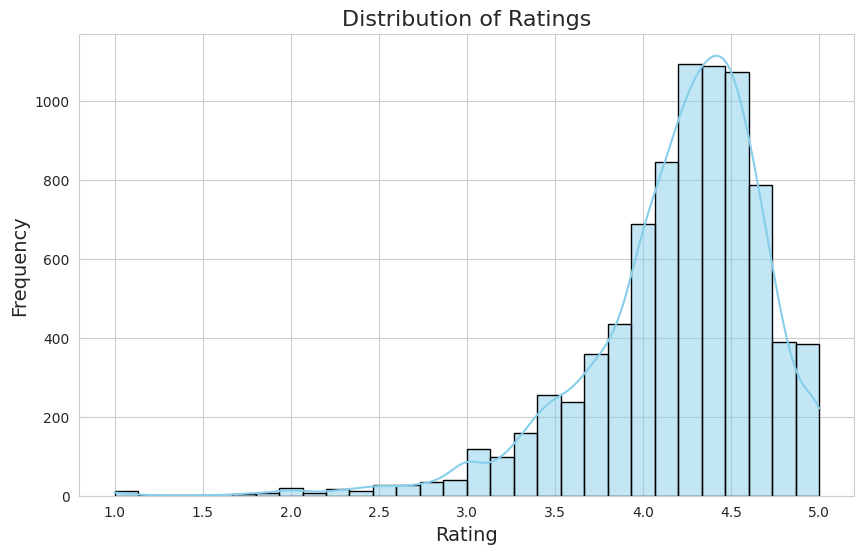

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_products['rating'], kde=True, bins=30, color='skyblue', edgecolor='black')

# title and label
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

Impute missing values in 'rating' with the median since the histogram indicates a left-skewed distribution, meaning that it is more appropriate to impute missing values with the median rather than the mean. The median is less affected by outliers and skewed data, making it a better choice for imputation in this case.

In [262]:
df_products['rating'] = df_products['rating'].fillna(df_products['rating'].median())

In [263]:
df_products['reviews'].isna().sum()

0

### 1.2.2 Price

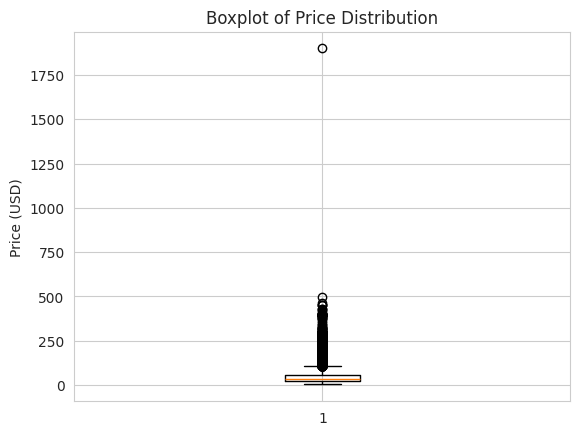

In [264]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.boxplot(df_products['price_usd'].dropna())

# Set the title and labels
plt.title('Boxplot of Price Distribution')
plt.ylabel('Price (USD)')

# Show the plot
plt.show()


In [265]:
df_products['price_usd'].max()

1900.0

We can drop this because it is clearly an outlier.

In [266]:
df_products = df_products[df_products['price_usd'] < 1900]

### 1.2.3 Duplicates

In [267]:
duplicates = df_products[df_products.duplicated(['product_name', 'brand_name'], keep=False)]
duplicates.head()

product_id                                       product_name  brand_id  \
897     P280544                                       Brilliantine      5995   
946     P425469                                       Brilliantine      5995   
1327    P415749  Body Fit Anti-Cellulite Contouring & Firming E...      2082   
1340    P456195  Body Fit Anti-Cellulite Contouring & Firming E...      2082   
1407    P122882                                Clarifying Lotion 2      1254   

             brand_name  loves_count  rating  reviews  \
897   Bumble and bumble         8738  4.2990    301.0   
946   Bumble and bumble         2140  4.5000     10.0   
1327            Clarins        18756  4.0385     52.0   
1340            Clarins         6074  3.5455     11.0   
1407           CLINIQUE        38875  4.3815   1376.0   

                                            ingredients  price_usd  \
897   ['Water, Glycerin, Caprylic/Capric Triglycerid...       26.0   
946   ['Water, Glycerin, Caprylic/Capric Triglycerid...       26.0   
1327  ['Water, Alcohol, Glycerin, Butylene Glycol,Di...       77.0   
1340  ['Water, Caprylic/Capric Triglyceride, Alcohol...       66.0   
1407  ['Water\\Aqua\\Eau, Alcohol Denat., Glycerin, ...       20.0   

      limited_edition  new  online_only  out_of_stock  sephora_exclusive  \
897                 0    0            0             0                  0   
946                 0    0            0             0                  0   
1327                0    0            0             0                  0   
1340                0    0            0             0                  0   
1407                0    0            0             0                  0   

                                             highlights primary_category  \
897                                             Unknown             Hair   
946                                             Unknown        Mini Size   
1327  ['Good for: Loss of firmness', 'Hydrating', 'W...      Bath & Body   
1340                                            Unknown      Bath & Body   
1407                                            Unknown         Skincare   

             secondary_category          tertiary_category  child_count  
897   Hair Styling & Treatments      Hair Styling Products            0  
946                        Hair                    Unknown            0  
1327                  Body Care  Cellulite & Stretch Marks            1  
1340                  Body Care  Cellulite & Stretch Marks            0  
1407                  Cleansers                     Toners            2

We checked for duplicates and found products that had the same product name and brand name but we realized that because the product and its mini / travel sized version are considered separate products on Sephora, they are not actually duplicates, as they have different features and different prices. So we will keep them.

### 1.2.4 Data Types

We can convert reviews from float to int as they contain whole numbers.



In [268]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8493 entries, 0 to 8493
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8493 non-null   object 
 1   product_name        8493 non-null   object 
 2   brand_id            8493 non-null   int64  
 3   brand_name          8493 non-null   object 
 4   loves_count         8493 non-null   int64  
 5   rating              8493 non-null   float64
 6   reviews             8493 non-null   float64
 7   ingredients         8493 non-null   object 
 8   price_usd           8493 non-null   float64
 9   limited_edition     8493 non-null   int64  
 10  new                 8493 non-null   int64  
 11  online_only         8493 non-null   int64  
 12  out_of_stock        8493 non-null   int64  
 13  sephora_exclusive   8493 non-null   int64  
 14  highlights          8493 non-null   object 
 15  primary_category    8493 non-null   object 
 16  secondary_c

In [269]:
df_products['reviews'] = df_products['reviews'].astype('int64')

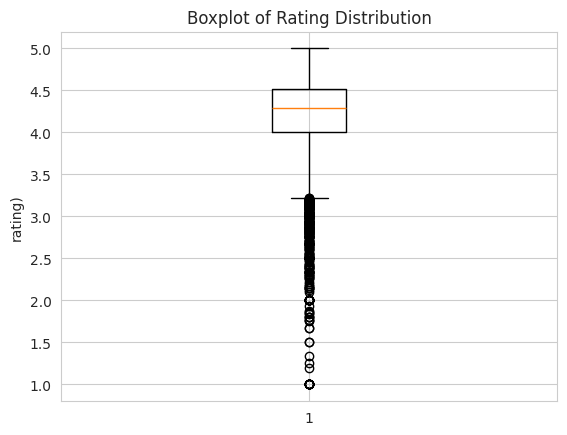

In [270]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.boxplot(df_products['rating'].dropna())

# Set the title and labels
plt.title('Boxplot of Rating Distribution')
plt.ylabel('rating)')

# Show the plot
plt.show()

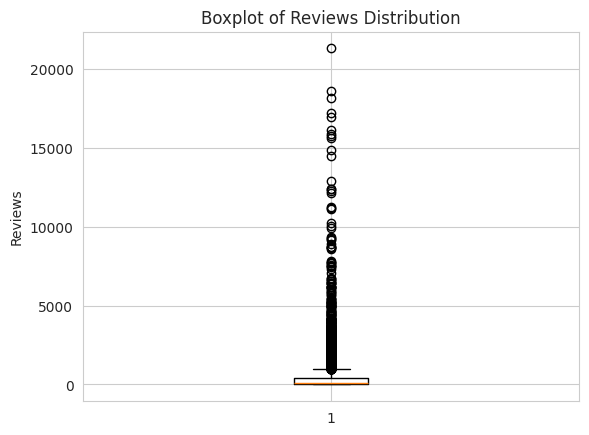

In [271]:
# Create a boxplot
plt.boxplot(df_products['reviews'].dropna())

# Set the title and labels
plt.title('Boxplot of Reviews Distribution')
plt.ylabel('Reviews')

# Show the plot
plt.show()

In [272]:
df_products[df_products['reviews'] > 20000] #investigation of the outlier

product_id                                   product_name  brand_id  \
4250    P245205  Tattoo Liner Vegan Waterproof Liquid Eyeliner      5905   

      brand_name  loves_count  rating  reviews  \
4250  KVD Beauty       566585   4.131    21281   

                                            ingredients  price_usd  \
4250  ['Water, Ammonium Styrene/Acrylates Copolymer,...       25.0   

      limited_edition  new  online_only  out_of_stock  sephora_exclusive  \
4250                0    0            0             0                  0   

                                             highlights primary_category  \
4250  ['Vegan', 'Community Favorite', "allure 2018 R...           Makeup   

     secondary_category tertiary_category  child_count  
4250                Eye          Eyeliner            3

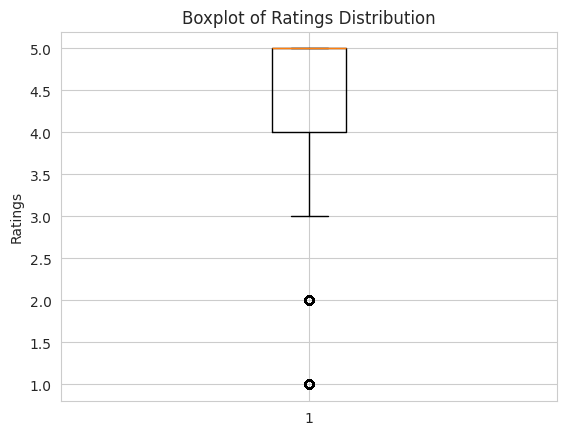

In [273]:
# Create a boxplot
plt.boxplot(df_reviews['rating'].dropna())

# Set the title and labels
plt.title('Boxplot of Ratings Distribution')
plt.ylabel('Ratings')

# Show the plot
plt.show()

In [274]:
df_reviews['rating'].value_counts()

rating
5    698951
4    199389
3     81816
1     61223
2     53032
Name: count, dtype: int64

In [275]:
df_reviews['submission_time'] = pd.to_datetime(df_reviews['submission_time'])

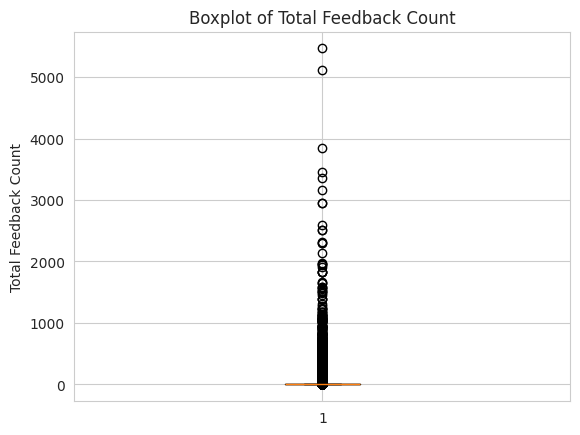

In [276]:
# Create a boxplot
plt.boxplot(df_reviews['total_feedback_count'].dropna())

# Set the title and labels
plt.title('Boxplot of Total Feedback Count')
plt.ylabel('Total Feedback Count')

# Show the plot
plt.show()

In [277]:
df_reviews['skin_tone'].value_counts()

skin_tone
light          266418
fair           208034
lightMedium    196541
Unknown        170539
medium          70486
mediumTan       62456
fairLight       56228
tan             33678
deep            20601
rich             5493
olive            1730
porcelain        1612
dark              522
notSureST          70
ebony               3
Name: count, dtype: int64

In [278]:
df_reviews['author_id'].value_counts()

author_id
1696370280     234
1288462295     171
5060164185     132
2330399812     131
7375781965     130
              ... 
35785194231      1
34116589282      1
38362244649      1
37964060718      1
5595682861       1
Name: count, Length: 578653, dtype: int64

In [200]:
df_reviews[df_reviews['author_id'] == '1696370280'].sort_values(by='submission_time').head(2)

author_id  rating  total_feedback_count  total_neg_feedback_count  \
73995   1696370280       5                     2                         0   
519865  1696370280       5                     2                         1   

        total_pos_feedback_count submission_time  \
73995                          2      2020-12-30   
519865                         1      2020-12-30   

                                              review_text      review_title  \
73995   I love using this in conjunction with the blue...   amazing product   
519865  I love this cleanser, and this entire line of ...  Love the tingle!   

       skin_tone eye_color    skin_type hair_color product_id  \
73995      light     brown  combination      black    P400203   
519865     light     brown  combination      black    P416815   

                                             product_name    brand_name  \
73995   Lapis Blue Tansy Face Oil - For Oily & Acne-Pr...     Herbivore   
519865             Find Your Balance Oil Control Cleanser  OLEHENRIKSEN   

        price_usd  
73995        74.0  
519865       33.0

# 2. EDA

### 2.1 Products EDA

In [201]:
from tabulate import tabulate

# Calculate basic statistics for numerical features in product_data
statistics = df_products[['loves_count', 'rating', 'reviews', 'price_usd']].describe()

# Convert the DataFrame to a list of lists for tabulation
statistics_table = statistics.reset_index().values.tolist()

# Tabulate the statistics with a prettier format
table_headers = ["Statistic", "Loves Count", "Rating", "Reviews", "Price (USD)"]
print(tabulate(statistics_table, headers=table_headers, tablefmt="pretty", numalign="right"))

+-----------+--------------------+--------------------+--------------------+-------------------+
| Statistic |    Loves Count     |       Rating       |      Reviews       |    Price (USD)    |
+-----------+--------------------+--------------------+--------------------+-------------------+
|   count   |       8493.0       |       8493.0       |       8493.0       |      8493.0       |
|   mean    | 29182.512539738607 |  4.19766951607206  | 433.9156952784646  | 51.43796302837631 |
|    std    | 66095.45594661623  | 0.5084544258376316 | 1086.7857434631494 | 49.78326214736252 |
|    min    |        0.0         |        1.0         |        0.0         |        3.0        |
|    25%    |       3758.0       |        4.0         |        22.0        |       25.0        |
|    50%    |       9881.0       | 4.289350000000001  |       112.0        |       35.0        |
|    75%    |      26859.0       |       4.5225       |       402.0        |       58.0        |
|    max    |     1401068.0   

The statistics for the numerical features in the product dataset reveal interesting insights. On average, products have approximately 29,180 loves, a rating of around 4.20, 434 reviews, and are priced at 51.66. However, there is significant variability in these metrics, with loves_count ranging from 0 to over 1.4 million, ratings ranging from 1 to 5, reviews ranging from 0 to over 21,000, and prices ranging from 3 to 1,900.

In [202]:
# Check the distribution of categorical variables in product_data
df_products[['limited_edition', 'online_only', 'out_of_stock', 'sephora_exclusive']].apply(pd.Series.value_counts)

limited_edition  online_only  out_of_stock  sephora_exclusive
0             7896         6633          7867               6121
1              597         1860           626               2372

Limited Edition: Out of 8,494 products, 597 are classified as limited edition, indicating that a relatively small proportion of products fall into this category.

Online Only: A significant portion of products, 1,861 out of 8,494, are available exclusively online, suggesting that Sephora offers a substantial selection of products that can only be purchased through their online platform.

Out of Stock: Among the products in the dataset, 626 are currently out of stock, indicating that a portion of the products may not be readily available for purchase at the time of data collection.

Sephora Exclusive: Approximately 2,373 products are identified as exclusive to Sephora, suggesting that a considerable number of products are unique to Sephora's offerings, potentially serving as a competitive advantage in attracting customers to the platform.

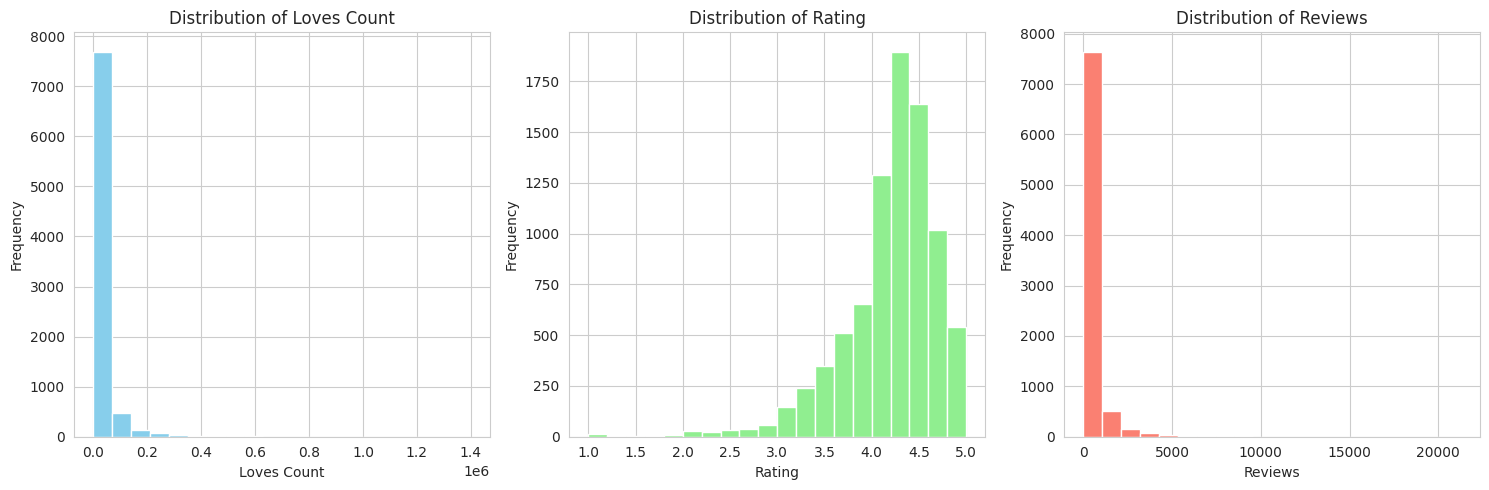

Top 10 Popular Products:
                                           product_name  loves_count
6242                            Soft Pinch Liquid Blush      1401068
5249                           Radiant Creamy Concealer      1153594
4431  Lip Sleeping Mask Intense Hydration with Vitam...      1081315
6434                    Cream Lip Stain Liquid Lipstick      1029051
2523                 Gloss Bomb Universal Lip Luminizer       968317
2524   Pro Filt’r Soft Matte Longwear Liquid Foundation       856497
5250                                              Blush       840076
247           Brow Wiz Ultra-Slim Precision Brow Pencil       834189
4458                   Translucent Loose Setting Powder       813497
7648        Niacinamide 10% + Zinc 1% Oil Control Serum       763168

Top 10 Highly Rated Products:
                                          product_name  rating
44                      Aperitivo In Terrazza Diffuser     5.0
128  Liquid Gold Midnight Reboot Serum with 14% Gly...     

In [203]:
# Distribution exploration
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Distribution of loves_count
axs[0].hist(df_products['loves_count'], bins=20, color='skyblue')
axs[0].set_title('Distribution of Loves Count')
axs[0].set_xlabel('Loves Count')
axs[0].set_ylabel('Frequency')

# Distribution of rating
axs[1].hist(df_products['rating'], bins=20, color='lightgreen')
axs[1].set_title('Distribution of Rating')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Frequency')

# Distribution of reviews
axs[2].hist(df_products['reviews'], bins=20, color='salmon')
axs[2].set_title('Distribution of Reviews')
axs[2].set_xlabel('Reviews')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Identify popular products based on loves_count
popular_products = df_products.nlargest(10, 'loves_count')[['product_name', 'loves_count']]
print("Top 10 Popular Products:")
print(popular_products)

# Identify highly rated products based on rating
highly_rated_products = df_products.nlargest(10, 'rating')[['product_name', 'rating']]
print("\nTop 10 Highly Rated Products:")
print(highly_rated_products)

The top 10 most loved products are predominantly makeup items, including blush, concealer, lipstick, and foundation. Among them, the Soft Pinch Liquid Blush stands out with the highest loves_count, indicating its popularity among customers. On the other hand, the top 10 highly rated products feature a diverse range of items, from skincare to fragrance, suggesting a broader appeal across different product categories. These products have all received a perfect rating of 5.0, indicating exceptional customer satisfaction and quality.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



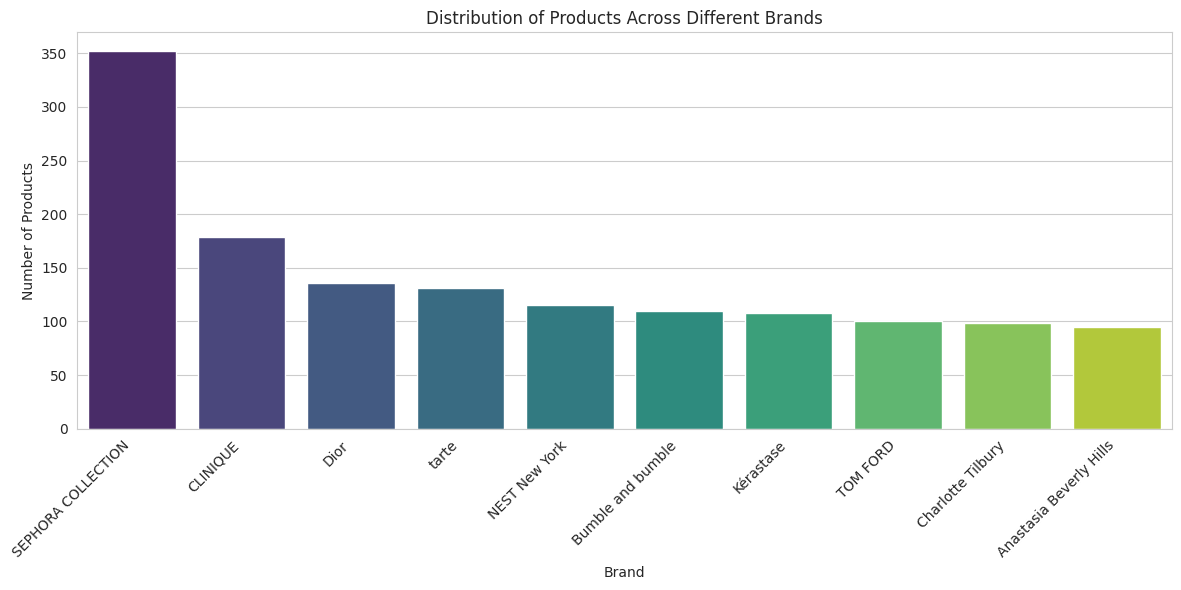

Top 10 Popular Brands Based on Number of Products:
brand_name
SEPHORA COLLECTION         352
CLINIQUE                   179
Dior                       136
tarte                      131
NEST New York              115
Bumble and bumble          110
Kérastase                  108
TOM FORD                   100
Charlotte Tilbury           99
Anastasia Beverly Hills     95
Name: count, dtype: int64

Top 10 Popular Brands Based on Overall Rating:
brand_name
Aquis                  4.904800
MACRENE actives        4.889420
MARA                   4.823860
CANOPY                 4.813733
DOMINIQUE COSMETICS    4.785700
BondiBoost             4.776950
Erno Laszlo            4.763117
DAMDAM                 4.752775
Kate McLeod            4.751583
maude                  4.740100
Name: rating, dtype: float64


In [204]:
# Distribution of products across different brands
plt.figure(figsize=(12, 6))
brand_counts = df_products['brand_name'].value_counts().nlargest(10)
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Distribution of Products Across Different Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify popular brands based on the number of products
print("Top 10 Popular Brands Based on Number of Products:")
print(brand_counts)

# Identify popular brands based on overall rating
brand_rating = df_products.groupby('brand_name')['rating'].mean().nlargest(10)
print("\nTop 10 Popular Brands Based on Overall Rating:")
print(brand_rating)



The top 10 popular brands based on the number of products are predominantly well-known names in the beauty industry, with Sephora Collection leading by a significant margin. Conversely, the top 10 popular brands based on overall rating feature lesser-known or niche brands like Aquis, Macrene Actives, and Mara, indicating that smaller brands can still achieve high levels of customer satisfaction and loyalty. This suggests that consumers are increasingly valuing quality and efficacy over brand recognition alone.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



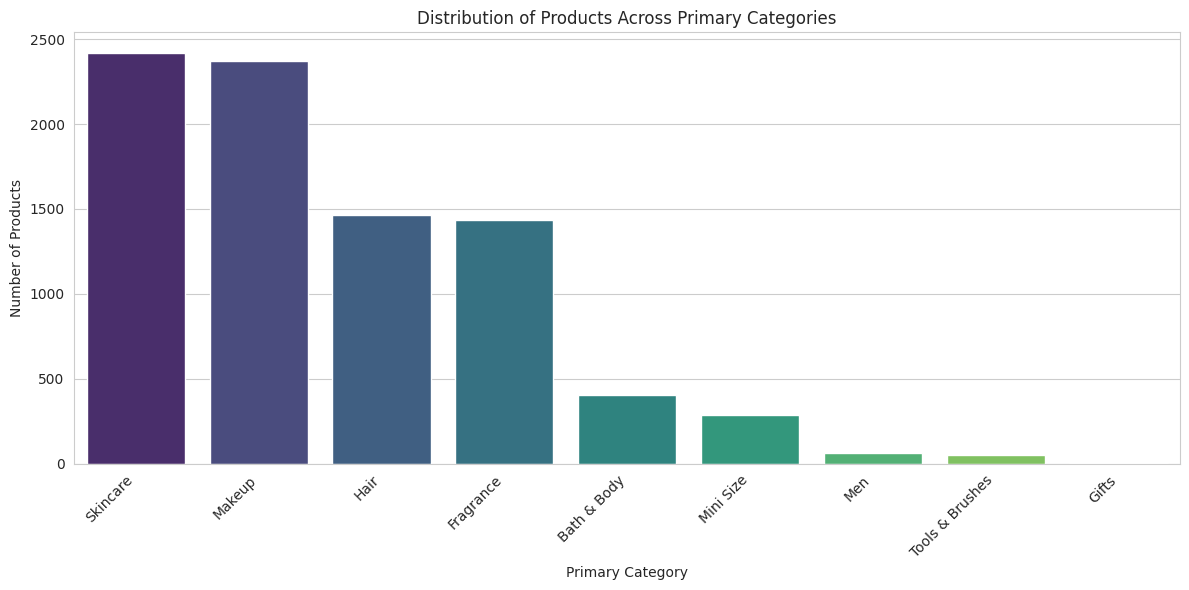

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



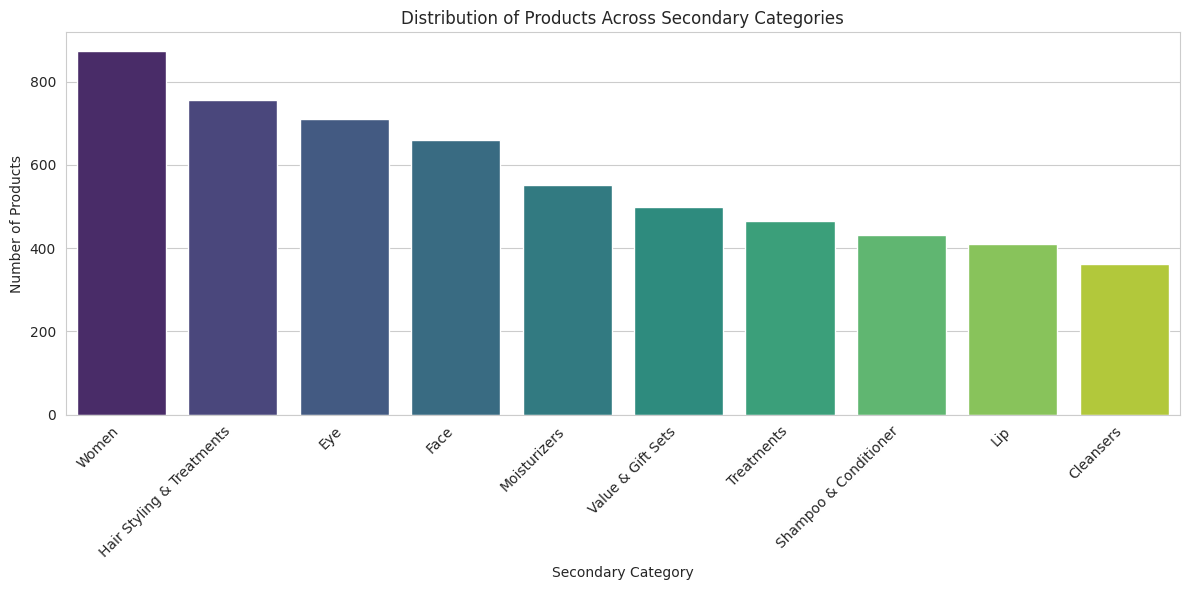

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



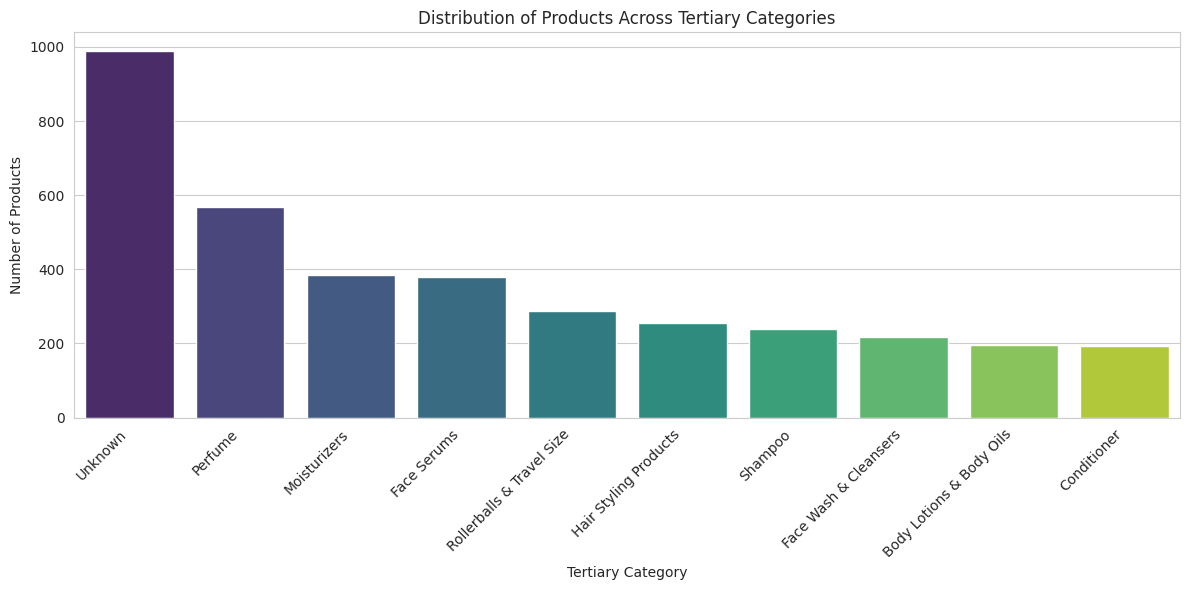

Top 10 Most Common Primary Categories:
primary_category
Skincare           2419
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: count, dtype: int64

Top 10 Most Common Secondary Categories:
secondary_category
Women                        875
Hair Styling & Treatments    757
Eye                          711
Face                         659
Moisturizers                 551
Value & Gift Sets            498
Treatments                   466
Shampoo & Conditioner        431
Lip                          411
Cleansers                    361
Name: count, dtype: int64

Top 10 Most Common Tertiary Categories:
tertiary_category
Unknown                      990
Perfume                      568
Moisturizers                 386
Face Serums                  379
Rollerballs & Travel Size    287
Hair Styling Products        255
Shampoo                     

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



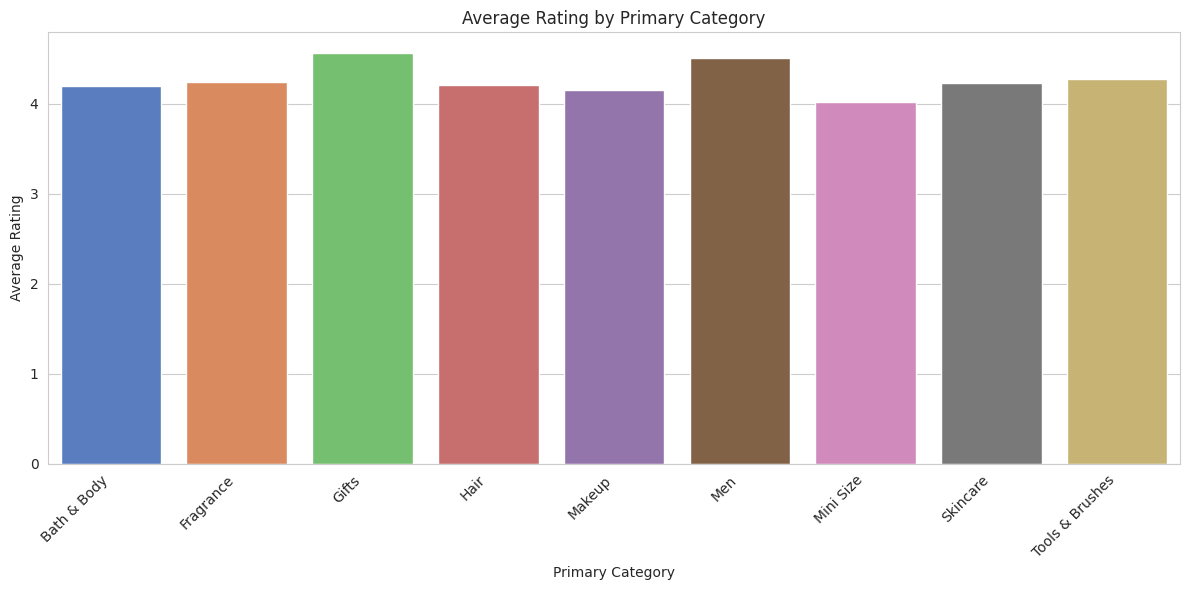

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



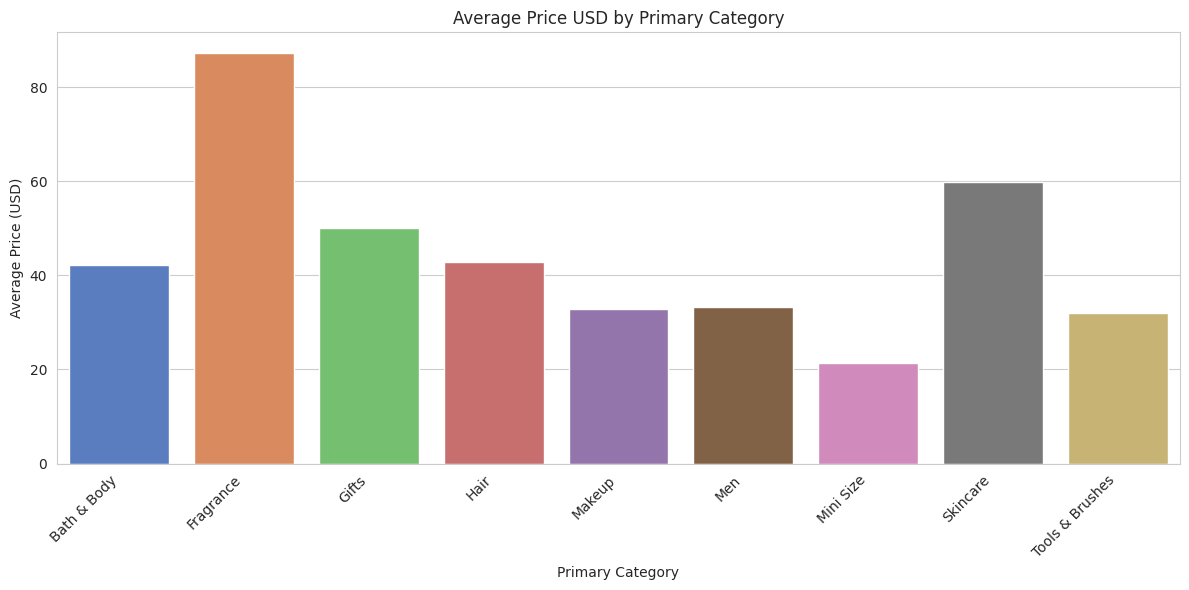

In [205]:
# Distribution of products across primary categories
plt.figure(figsize=(12, 6))
primary_category_counts = df_products['primary_category'].value_counts().nlargest(10)
sns.barplot(x=primary_category_counts.index, y=primary_category_counts.values, palette='viridis')
plt.title('Distribution of Products Across Primary Categories')
plt.xlabel('Primary Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of products across secondary categories
plt.figure(figsize=(12, 6))
secondary_category_counts = df_products['secondary_category'].value_counts().nlargest(10)
sns.barplot(x=secondary_category_counts.index, y=secondary_category_counts.values, palette='viridis')
plt.title('Distribution of Products Across Secondary Categories')
plt.xlabel('Secondary Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of products across tertiary categories
plt.figure(figsize=(12, 6))
tertiary_category_counts = df_products['tertiary_category'].value_counts().nlargest(10)
sns.barplot(x=tertiary_category_counts.index, y=tertiary_category_counts.values, palette='viridis')
plt.title('Distribution of Products Across Tertiary Categories')
plt.xlabel('Tertiary Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify the most common categories
print("Top 10 Most Common Primary Categories:")
print(primary_category_counts)
print("\nTop 10 Most Common Secondary Categories:")
print(secondary_category_counts)
print("\nTop 10 Most Common Tertiary Categories:")
print(tertiary_category_counts)

# Analyze average rating and price_usd by primary category
avg_rating_by_primary_category = df_products.groupby('primary_category')['rating'].mean()
avg_price_by_primary_category = df_products.groupby('primary_category')['price_usd'].mean()

# Plot average rating by primary category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_primary_category.index, y=avg_rating_by_primary_category.values, palette='muted')
plt.title('Average Rating by Primary Category')
plt.xlabel('Primary Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot average price_usd by primary category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_primary_category.index, y=avg_price_by_primary_category.values, palette='muted')
plt.title('Average Price USD by Primary Category')
plt.xlabel('Primary Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The top 10 most common primary categories include Skincare and Makeup, indicating that these are the most prevalent product types available. In secondary categories, Women's products are the most common, followed by categories like Hair Styling & Treatments and Eye products. Tertiary categories reveal that Perfume and Moisturizers are highly represented, while Rollerballs & Travel Size and Hair Styling Products also have a significant presence. This distribution suggests a diverse range of offerings catering to various beauty needs and preferences.

On average, Gifts have the highest rating out of the primary categories. And Fragrance has a distinctly higher price than other primary categories on average.

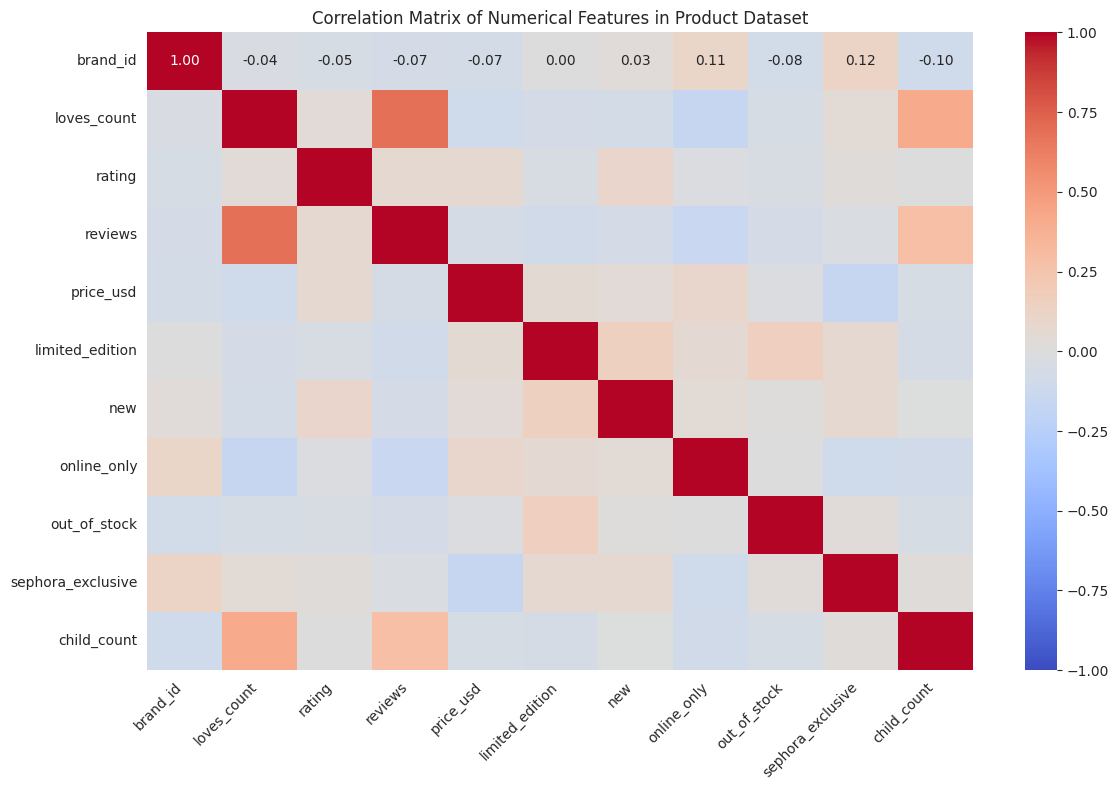

In [206]:
# Select numerical features from the product dataset
numerical_features = df_products.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features in Product Dataset')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The relatively high correlation between loves_count and reviews suggests that there is a strong relationship between the number of people marking a product as a favorite (loves_count) and the number of user reviews the product receives. This correlation implies that products with more favorites tend to also have more reviews, indicating that higher levels of user engagement, interest, and satisfaction may lead to increased review activity. In other words, when customers love a product, they are more likely to leave reviews about it, contributing to a higher number of overall reviews for that product.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



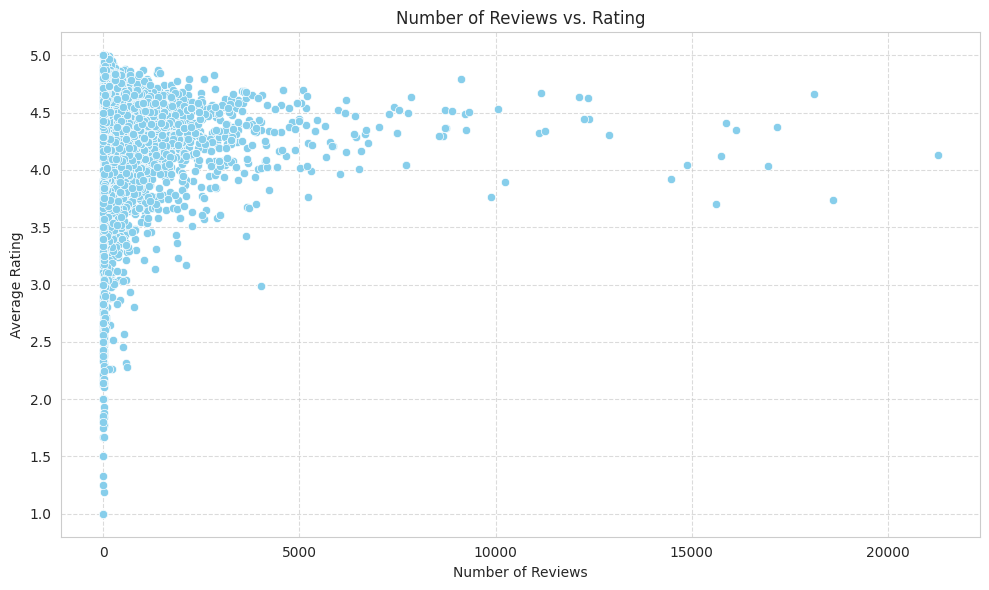

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews', y='rating', data=df_products, color='skyblue')
plt.title('Number of Reviews vs. Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

There seems to be no correlation between reviews and popularity. However, there is more ratings when for low number of reviews.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



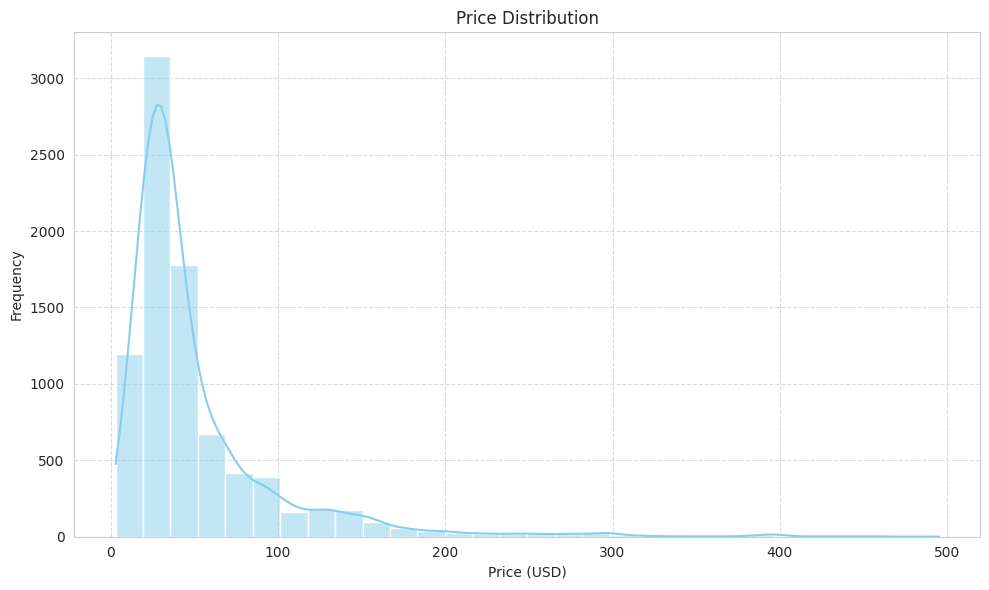

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_products['price_usd'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The price distribution seems to be skewed right with most products being under 100 dollars. This makes sense as Sephora mostly sells skincare and makeup products and a little bit over 100 dollar is the typical range.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



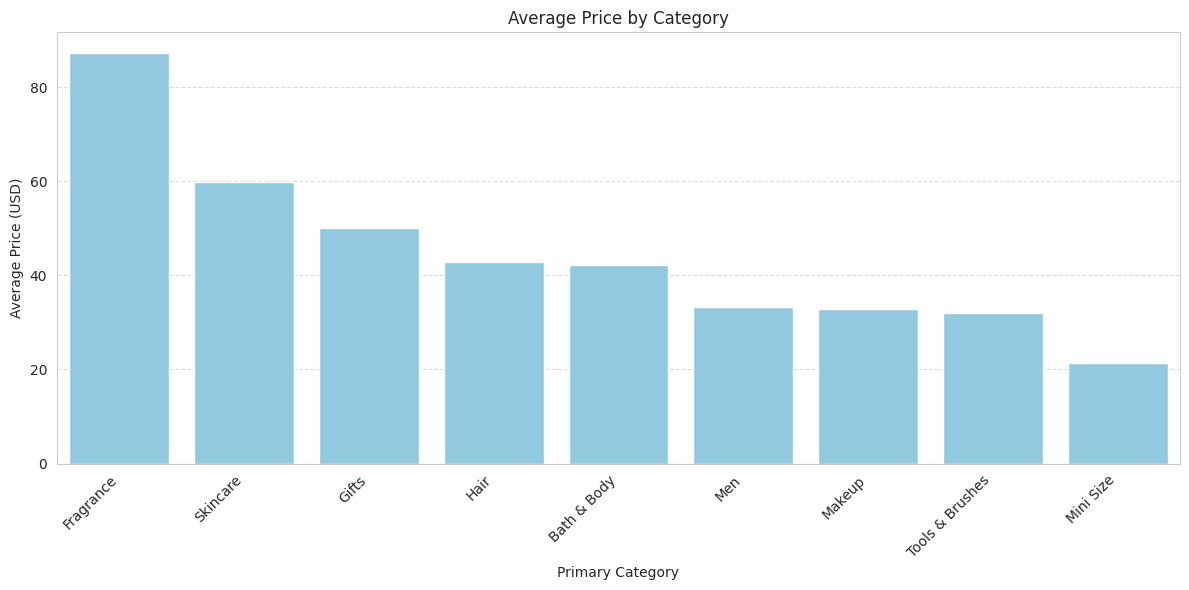

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average price by primary category
average_price_by_category = df_products.groupby('primary_category')['price_usd'].mean().reset_index()

# Sort the dataframe by average price in descending order
average_price_by_category = average_price_by_category.sort_values(by='price_usd', ascending=False)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_category', y='price_usd', data=average_price_by_category, color='skyblue')
plt.title('Average Price by Category')
plt.xlabel('Primary Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The results above are similar to what one would expect. Fragrances, skincare usually have a higher price point than makeup tools and travel size products.

<Figure size 1200x800 with 0 Axes>

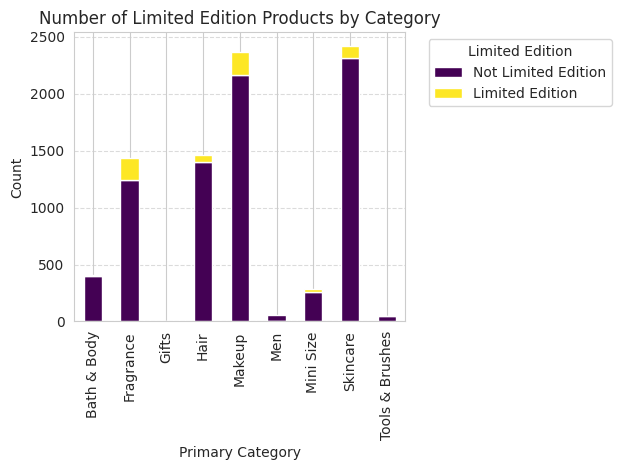

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of limited edition products by category
limited_edition_by_category = df_products.groupby(['primary_category', 'limited_edition']).size().unstack(fill_value=0)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 8))
limited_edition_by_category.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Limited Edition Products by Category')
plt.xlabel('Primary Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Limited Edition', labels=['Not Limited Edition', 'Limited Edition'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The makeup and fragrance categories seem to have more limited edition products but hair and skincare also have some exclusive products.

<Figure size 1200x800 with 0 Axes>

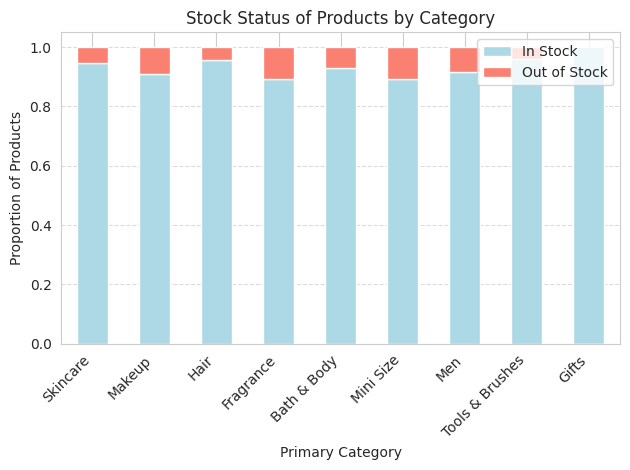

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by primary category and count the number of products in and out of stock in each category
stock_status_by_category = df_products.groupby('primary_category')['out_of_stock'].value_counts(normalize=True).unstack(fill_value=0)

# Reorder categories by the total number of products
category_order = df_products['primary_category'].value_counts().index

# Plotting the stacked bar chart using Seaborn
plt.figure(figsize=(12, 8))
stock_status_by_category.loc[category_order].plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

plt.title('Stock Status of Products by Category')
plt.xlabel('Primary Category')
plt.ylabel('Proportion of Products')
plt.xticks(rotation=45, ha='right')
plt.legend(['In Stock', 'Out of Stock'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Fragrance, Makeup and Mini Size are the top 3 categories with the most out of stock products.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



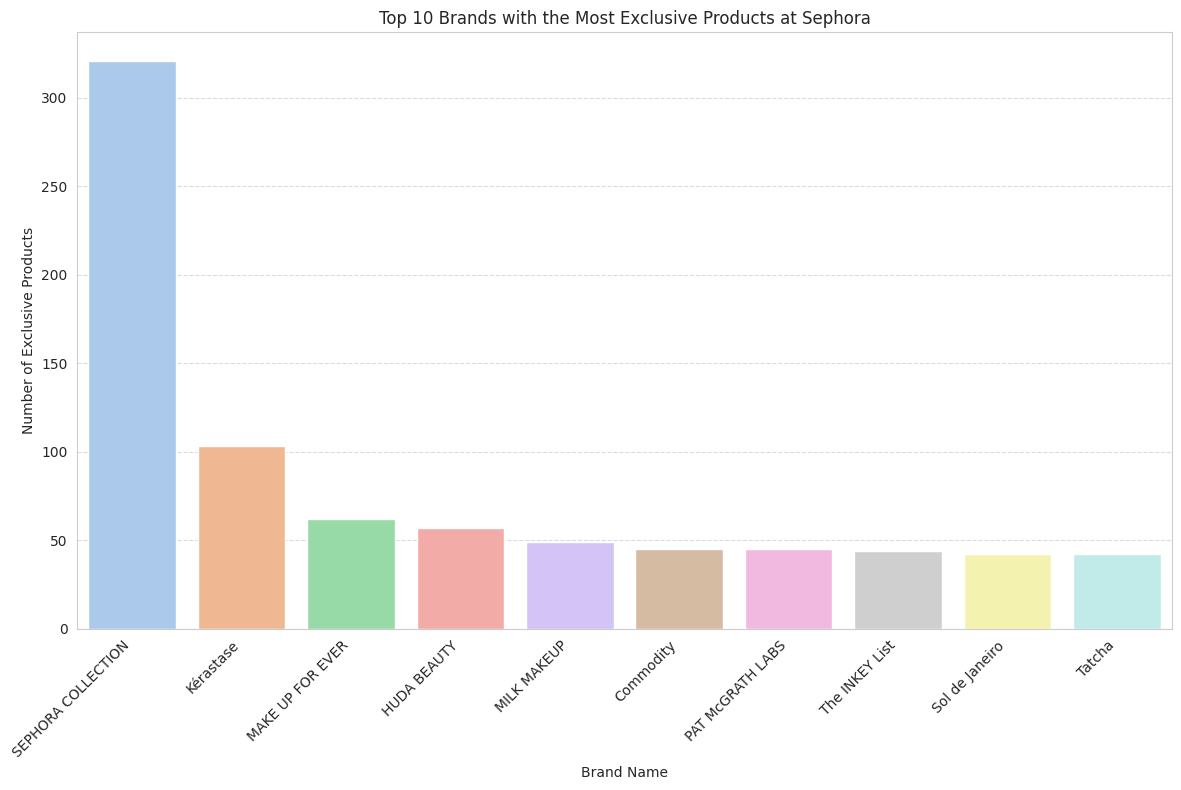

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by brand name and count the number of products that are exclusive to Sephora for each brand
exclusive_products_by_brand = df_products[df_products['sephora_exclusive'] == 1].groupby('brand_name').size().reset_index(name='exclusive_count')

# Sort the dataframe by the count of exclusive products in descending order and select the top 10 brands
top_10_exclusive_brands = exclusive_products_by_brand.nlargest(10, 'exclusive_count')

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='brand_name', y='exclusive_count', data=top_10_exclusive_brands, palette='pastel')

plt.title('Top 10 Brands with the Most Exclusive Products at Sephora')
plt.xlabel('Brand Name')
plt.ylabel('Number of Exclusive Products')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The graph above shows that Sephora carries renowned brands such as Kerastase, Sol de Janeiro, and Huda Beauty which makes it competitive in its industry.

In [213]:
# Check for negative values in 'loves_count' column
print(df_products[df_products['loves_count'] < 0])


Empty DataFrame
Columns: [product_id, product_name, brand_id, brand_name, loves_count, rating, reviews, ingredients, price_usd, limited_edition, new, online_only, out_of_stock, sephora_exclusive, highlights, primary_category, secondary_category, tertiary_category, child_count]
Index: []


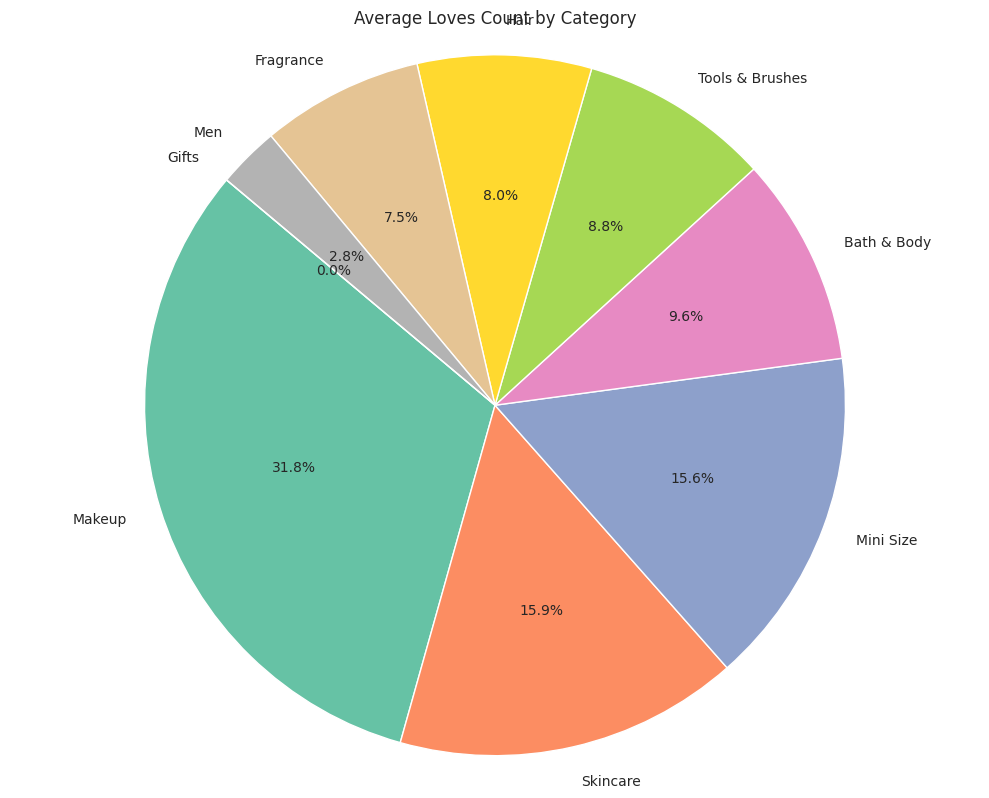

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average loves count by category
average_loves_by_category = df_products.groupby('primary_category')['loves_count'].mean().reset_index()

# Sort the dataframe by the average loves count in descending order
average_loves_by_category = average_loves_by_category.sort_values(by='loves_count', ascending=False)

# Plotting the pie chart using Matplotlib
plt.figure(figsize=(10, 8))
plt.pie(average_loves_by_category['loves_count'], labels=average_loves_by_category['primary_category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))

plt.title('Average Loves Count by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


Makeup, skincare, and travel size products have more love counts than some categories such as gift, men, and fragrance.

In [215]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [216]:
from tabulate import tabulate
# Assuming df_products is your DataFrame containing product information

# Filter the DataFrame to include only limited edition products
limited_edition_products = df_products[df_products['limited_edition'] == 1]

# Sort the limited edition products by rating (change to another metric if needed)
top_limited_edition_products = limited_edition_products.sort_values(by='rating', ascending=False)

# Display information about the top limited edition products
top_limited_edition_products_info = top_limited_edition_products[['product_name', 'brand_name', 'rating', 'price_usd']]


# Display information about the top limited edition products as a table without the index column
print(tabulate(top_limited_edition_products_info, headers='keys', tablefmt='pretty', showindex=False))


+--------------------------------------------------------------------------------------+------------------------------+-------------------+-----------+
|                                     product_name                                     |          brand_name          |      rating       | price_usd |
+--------------------------------------------------------------------------------------+------------------------------+-------------------+-----------+
|                                  Daisy Perfume Set                                   |    Marc Jacobs Fragrances    |        5.0        |   75.0    |
|                      Mask and Moisturize Duo Skincare Gift Set                       |      Kiehl's Since 1851      |        5.0        |   30.0    |
|                            Mini Perfume Icons Sampler Set                            |         KILIAN Paris         |        5.0        |   30.0    |
|                         Dive Into Hydration Head-to-Toe Set                          |

Most of the out of stock products are fragrances, limited edition sets that appeared in the table for limited edition products and items from popular makeup brands which probably sold out fast.

In [217]:
from tabulate import tabulate

# Group by category and calculate minimum, maximum, and average price
price_range_by_category = df_products.groupby('primary_category').agg(
    min_price=('price_usd', 'min'),
    max_price=('price_usd', 'max'),
    avg_price=('price_usd', 'mean')
).reset_index()

# Display price range by category as a table using tabulate
print(tabulate(price_range_by_category, headers='keys', tablefmt='grid', showindex=False))

+--------------------+-------------+-------------+-------------+
| primary_category   |   min_price |   max_price |   avg_price |
+====================+=============+=============+=============+
| Bath & Body        |        3    |         300 |     42.2333 |
+--------------------+-------------+-------------+-------------+
| Fragrance          |       10    |         395 |     87.2626 |
+--------------------+-------------+-------------+-------------+
| Gifts              |       50    |          50 |     50      |
+--------------------+-------------+-------------+-------------+
| Hair               |        5    |         399 |     42.7867 |
+--------------------+-------------+-------------+-------------+
| Makeup             |        3    |         320 |     32.758  |
+--------------------+-------------+-------------+-------------+
| Men                |       10    |         104 |     33.2    |
+--------------------+-------------+-------------+-------------+
| Mini Size          |   

This table shows that all categories except gifts tend to have a wide price range.

### 2.2 Reviews EDA

In [218]:
# Calculate basic statistics for numerical features in reviews_data
df_reviews[['rating']].describe()

rating
count  1.094411e+06
mean   4.299158e+00
std    1.149444e+00
min    1.000000e+00
25%    4.000000e+00
50%    5.000000e+00
75%    5.000000e+00
max    5.000000e+00


The statistics for the rating feature in the reviews dataset indicate that, on average, products are highly rated at around 4.30. The majority of ratings fall within the range of 4 to 5, with the median rating being 5. This suggests that most products receive positive ratings from users, contributing to the overall high average rating observed.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



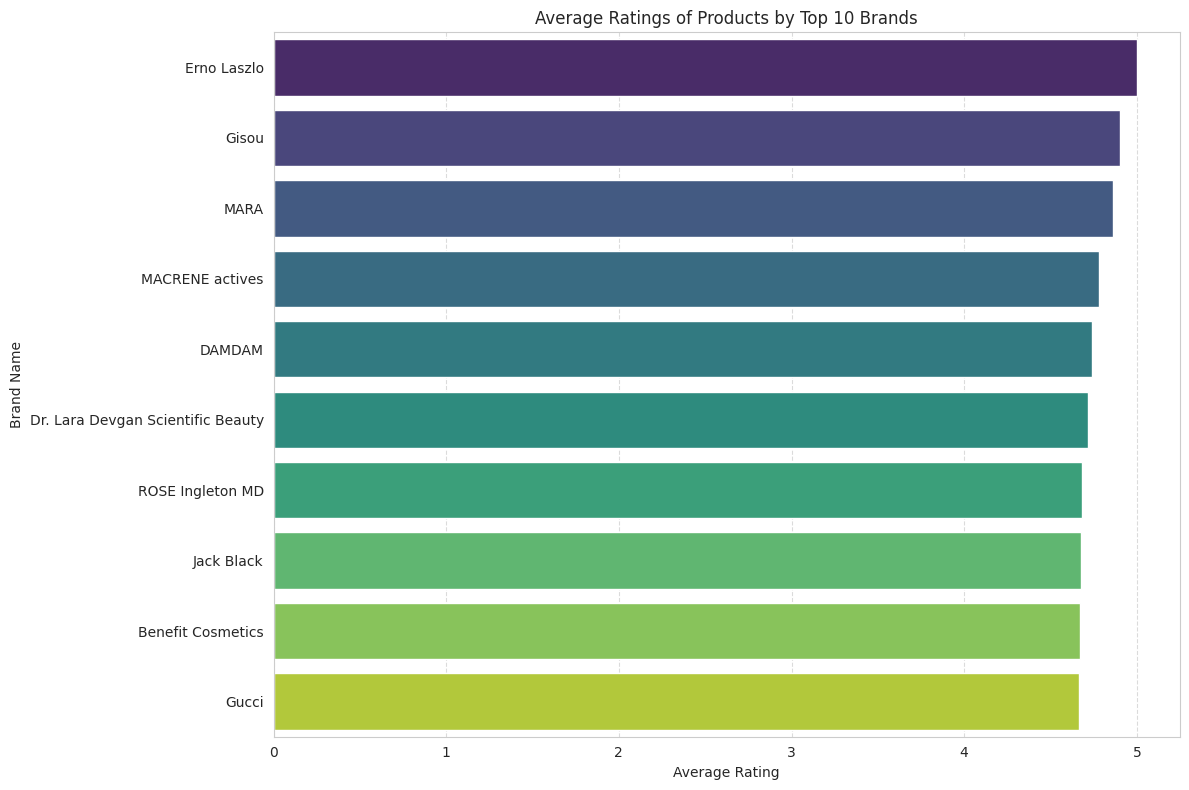

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average rating by brand
average_rating_by_brand = df_reviews.groupby('brand_name')['rating'].mean().reset_index()

# Sort the dataframe by the average rating in descending order and select the top 10 brands
top_10_brands = average_rating_by_brand.sort_values(by='rating', ascending=False).head(10)

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='brand_name', data=top_10_brands, palette='viridis')

plt.title('Average Ratings of Products by Top 10 Brands')
plt.xlabel('Average Rating')
plt.ylabel('Brand Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The brands with the highest average ratings (5 for all) were all skincare, luxury and renowned make up brands. As reputable brands it is not surprising that they are highly rated by customers.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



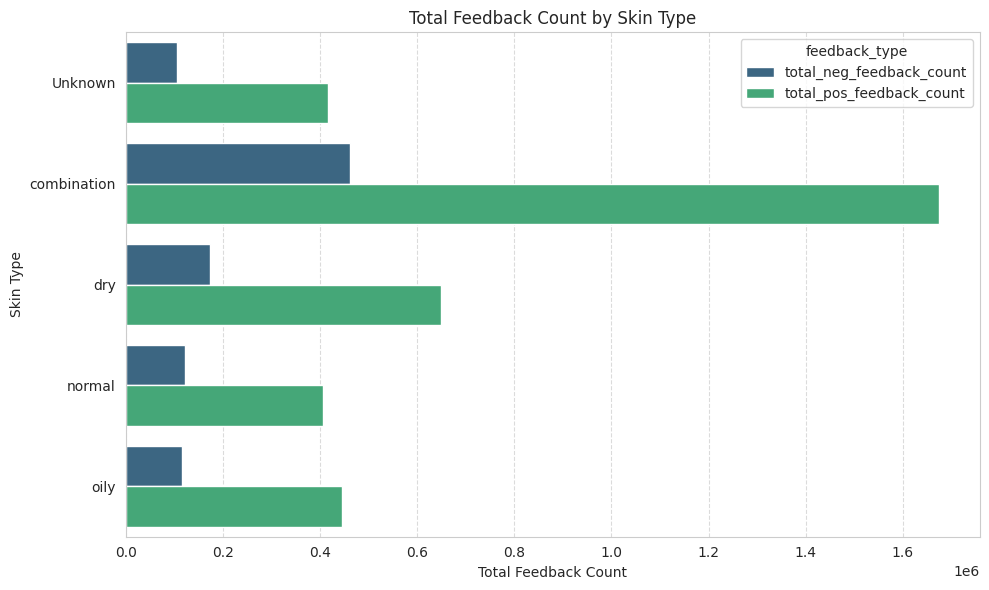

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total feedback count by skin type
df_reviews['total_feedback_count'] = df_reviews['total_neg_feedback_count'] + df_reviews['total_pos_feedback_count']
total_feedback_by_skin_type = df_reviews.groupby('skin_type').agg({
    'total_neg_feedback_count': 'sum',
    'total_pos_feedback_count': 'sum'
}).reset_index()

# Melt the dataframe to long format
total_feedback_by_skin_type = total_feedback_by_skin_type.melt(id_vars='skin_type', var_name='feedback_type', value_name='feedback_count')

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='feedback_count', y='skin_type', hue='feedback_type', data=total_feedback_by_skin_type, palette='viridis')

plt.title('Total Feedback Count by Skin Type')
plt.xlabel('Total Feedback Count')
plt.ylabel('Skin Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The graph above shows that most skin types have more positive feedback than negtive ones. This may imply that Sephora generally does well in catering to the needs of different types of skin. However, combination skin has the highest negative feedback and it may be good to explore why customers are not satisfied.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a f

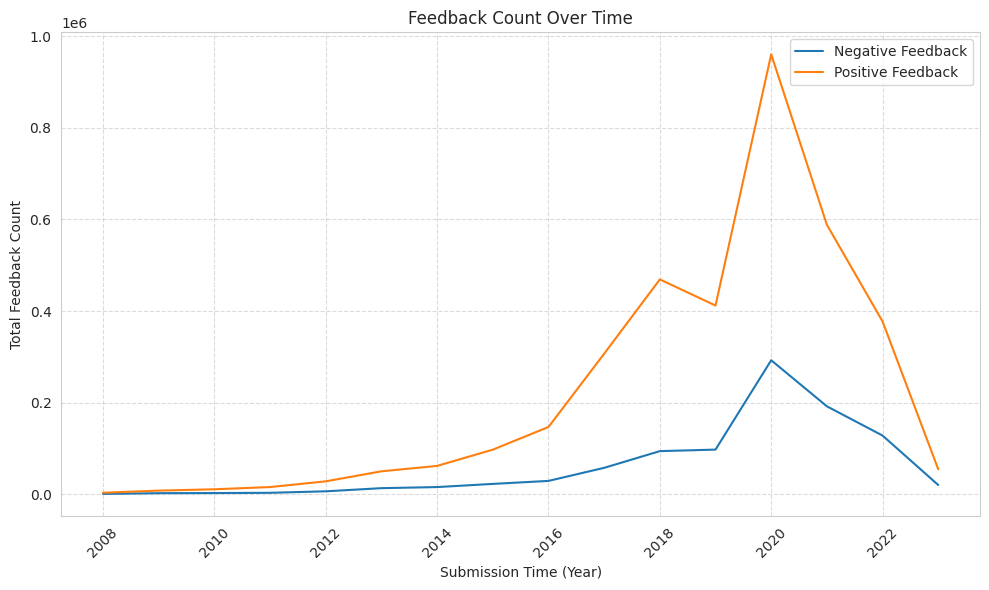

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_reviews is your DataFrame containing review data

# Convert 'total_feedback_count', 'total_neg_feedback_count', and 'total_pos_feedback_count' to numeric, coercing errors to NaN
df_reviews['total_feedback_count'] = pd.to_numeric(df_reviews['total_feedback_count'], errors='coerce')
df_reviews['total_neg_feedback_count'] = pd.to_numeric(df_reviews['total_neg_feedback_count'], errors='coerce')
df_reviews['total_pos_feedback_count'] = pd.to_numeric(df_reviews['total_pos_feedback_count'], errors='coerce')

# Drop rows with NaN values in relevant columns
df_reviews.dropna(subset=['total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count'], inplace=True)

# Extract year from 'submission_time'
df_reviews['submission_year'] = df_reviews['submission_time'].dt.year

# Create a new DataFrame to store aggregated total, positive, and negative feedback counts over time
total_feedback_over_time = df_reviews.groupby('submission_year').agg({
    'total_feedback_count': 'sum',
    'total_neg_feedback_count': 'sum',
    'total_pos_feedback_count': 'sum'
}).reset_index()

# Plotting the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='submission_year', y='total_neg_feedback_count', data=total_feedback_over_time, label='Negative Feedback')
sns.lineplot(x='submission_year', y='total_pos_feedback_count', data=total_feedback_over_time, label='Positive Feedback')

plt.title('Feedback Count Over Time')
plt.xlabel('Submission Time (Year)')
plt.ylabel('Total Feedback Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


The trend above highlights Sephora's improvement as the gap between positive and negative reviews widen throughout the years.

In [222]:
import pandas as pd
from tabulate import tabulate

# Assuming df_reviews is your DataFrame containing review data

# Grouping by brand and aggregating product attributes
brand_attributes = df_reviews.groupby('brand_name').agg({
    'skin_tone': lambda x: x.value_counts().index[0] if not x.empty else None,
    'eye_color': lambda x: x.value_counts().index[0] if not x.empty else None,
    'skin_type': lambda x: x.value_counts().index[0] if not x.empty else None,
    'hair_color': lambda x: x.value_counts().index[0] if not x.empty else None
}).reset_index()

# Using tabulate to display the DataFrame in a tabular format
print(tabulate(brand_attributes, headers='keys', tablefmt='psql'))

+-----+-----------------------------------+-------------+-------------+-------------+--------------+
|     | brand_name                        | skin_tone   | eye_color   | skin_type   | hair_color   |
|-----+-----------------------------------+-------------+-------------+-------------+--------------|
|   0 | Algenist                          | Unknown     | brown       | combination | brown        |
|   1 | Alpha-H                           | light       | brown       | combination | brown        |
|   2 | Anastasia Beverly Hills           | lightMedium | brown       | combination | black        |
|   3 | Augustinus Bader                  | light       | brown       | combination | brown        |
|   4 | BeautyBio                         | light       | brown       | combination | brown        |
|   5 | Benefit Cosmetics                 | Unknown     | brown       | combination | Unknown      |
|   6 | Biossance                         | light       | brown       | combination | brown

This table shows some brand attributes and could be used to determine if a brand is inclusive.

In [303]:
df_products_copy = df_products.copy()

### 2.2 Standardization

In [223]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_products = ['loves_count', 'rating', 'reviews', 'price_usd', 'child_count']
numerical_reviews = ['rating', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']

normalized_products = scaler.fit_transform(df_products[numerical_products])
df_products[numerical_products] = normalized_products

normalized_reviews = scaler.fit_transform(df_reviews[numerical_reviews])
df_reviews[numerical_reviews] = normalized_reviews

# 3. Unsupervised Methods

## 3.1 Market Basket Analysis

As the first method of unsupervised machine learning, we decided to use Market Basket Analysis to capture the products are typically purchased together.

This can be done by joining the `df_products` and `df_reviews` tables. From there, the products that have the same **review author** and **reviewed within a week** are grouped together as "one purchase"

### 3.1.1 Joining and grouping

In [67]:
joined_table = df_reviews.merge(df_products, on=['product_id', 'product_name', 'brand_name'], how= 'inner', suffixes=('reviews', 'products'))

In [68]:
by_author = joined_table.groupby(['author_id', pd.Grouper(key='submission_time', freq='W')])['product_name'].agg(list)

### 3.1.2 Tokenizing the grouped purchase

In [69]:
products_MBA = list(by_author.apply(lambda x: str(x).split(',')))

In [70]:
for indx, lst in enumerate(products_MBA):
  lst = [i for i in lst if i]
  products_MBA[indx] = lst

###3.1.2 One hot encoding

In [71]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [72]:
from mlxtend.preprocessing import TransactionEncoder
one_hot=TransactionEncoder()
df_encoded = pd.DataFrame(one_hot.fit(products_MBA).transform(products_MBA), columns=one_hot.columns_)

In [73]:
!pip install mlxtend

In [74]:
df_encoded.head()

"Beauty Sleep Overnight Repair Treatment Cream with AHA's and Vitamin C"]  \
0                                              False                            
1                                              False                            
2                                              False                            
3                                              False                            
4                                              False                            

    "Berries n' Choco Kisses Set"   "Berries n' Choco Kisses Set"]  \
0                           False                            False   
1                           False                            False   
2                           False                            False   
3                           False                            False   
4                           False                            False   

    "Cocoa Cleans'r Soothing All-Over Cleansing Bar"  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

    "Cocoa Cleans'r Soothing All-Over Cleansing Bar"]  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

    "Fenty Skin Travel Size Start'r Set"  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

    "Fenty Skin Travel Size Start'r Set"]  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

    "Let's Get Luminous Brightening Essentials Set"]  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

    "Mini Charlotte's Magic Cream"   "Mini Charlotte's Magic Cream"]  ...  \
0                            False                             False  ...   
1                            False                             False  ...   
2                            False                             False  ...   
3                            False                             False  ...   
4                            False                             False  ...   

   ['goopglow Cloudberry Exfoliating Jelly Cleanser']  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

   ['knockout brightening gel moisturizer']  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   ['knockout daily exfoliating cleanser'  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

   ['knockout daily exfoliating cleanser']  \
0                                    False   
1                                    False   
2                                    False   

### 3.1.3. Apriori and association rules

Due to the RAM of Colab notebooks, the `min_support` is set high to prevent notebook crash. If allowed, it's more ideal to lower the threshold to find more rules.

In [75]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df_encoded, min_support=0.0035, use_colnames=True)
frequent_itemsets.head()

support                                           itemsets
0  0.004645                ( 'Daily Microfoliant Exfoliator'])
1  0.005441  ( 'Green Clean Makeup Meltaway Cleansing Balm ...
2  0.004288  ( 'Mini Cicapair Tiger Grass Color Correcting ...
3  0.004499                            ( 'Mini Jet Lag Mask'])
4  0.005002          ( 'Mini Superfood Antioxidant Cleanser'])

In [76]:
rules= association_rules(frequent_itemsets, metric="support", min_threshold=0)
rules.sort_values(by= ['support', 'confidence'], ascending= False)

antecedents  \
2   ( 'Green Clean Makeup Meltaway Cleansing Balm ...   
3     (['Green Clean Makeup Removing Cleansing Balm')   
8           ( 'Mini Superfood Antioxidant Cleanser'])   
9                 (['Superfood Antioxidant Cleanser')   
1                 ( 'Daily Microfoliant Exfoliator'])   
0             (['Mini Daily Microfoliant Exfoliator')   
6                             ( 'Mini Jet Lag Mask'])   
7                                   (['Jet Lag Mask')   
4   ( 'Mini Cicapair Tiger Grass Color Correcting ...   
5   (['Cicapair Tiger Grass Color Correcting Treat...   
10  ( 'Mini Take The Day Off Cleansing Balm Makeup...   
11  (['Take The Day Off Cleansing Balm Makeup Remo...   
15                             (['Beauty Elixir Prep)   
14                                             ( Set)   
13                         ( 'Mini The Water Cream'])   
12  (['The Water Cream Oil-Free Pore Minimizing Mo...   

                                          consequents  antecedent support  \
2     (['Green Clean Makeup Removing Cleansing Balm')            0.005441   
3   ( 'Green Clean Makeup Meltaway Cleansing Balm ...            0.007091   
8                 (['Superfood Antioxidant Cleanser')            0.005002   
9           ( 'Mini Superfood Antioxidant Cleanser'])            0.006605   
1             (['Mini Daily Microfoliant Exfoliator')            0.004645   
0                 ( 'Daily Microfoliant Exfoliator'])            0.005272   
6                                   (['Jet Lag Mask')            0.004499   
7                             ( 'Mini Jet Lag Mask'])            0.004990   
4   (['Cicapair Tiger Grass Color Correcting Treat...            0.004288   
5   ( 'Mini Cicapair Tiger Grass Color Correcting ...            0.005751   
10  (['Take The Day Off Cleansing Balm Makeup Remo...            0.004213   
11  ( 'Mini Take The Day Off Cleansing Balm Makeup...            0.004788   
15                                             ( Set)            0.003808   
14                             (['Beauty Elixir Prep)            0.003953   
13  (['The Water Cream Oil-Free Pore Minimizing Mo...            0.003641   
12                         ( 'Mini The Water Cream'])            0.004535   

    consequent support   support  confidence        lift  leverage  \
2             0.007091  0.005419    0.995944  140.447466  0.005380   
3             0.005441  0.005419    0.764128  140.447466  0.005380   
8             0.006605  0.004941    0.987924  149.582718  0.004908   
9             0.005002  0.004941    0.748153  149.582718  0.004908   
1             0.005272  0.004617    0.993998  188.534295  0.004593   
0             0.004645  0.004617    0.875744  188.534295  0.004593   
6             0.004990  0.004445    0.988123  198.021118  0.004423   
7             0.004499  0.004445    0.890829  198.021118  0.004423   
4             0.005751  0.004250    0.991062  172.334650  0.004225   
5             0.004288  0.004250    0.739043  172.334650  0.004225   
10            0.004788  0.004080    0.968569  202.296059  0.004060   
11            0.004213  0.004080    0.852256  202.296059  0.004060   
15            0.003953  0.003808    1.000000  252.989715  0.003792   
14            0.003808  0.003808    0.963268  252.989715  0.003792   
13            0.004535  0.003523    0.967464  213.348636  0.003506   
12            0.003641  0.003523    0.776895  213.348636  0.003506   

    conviction  zhangs_metric  
2   244.778144       0.998311  
3     4.216517       0.999971  
8    82.260786       0.998308  
9     3.950811       0.999919  
1   165.746513       0.999338  
0     8.010490       0.999968  
6    83.775517       0.999446  
7     9.118707       0.999940  
4   111.235396       0.998479  
5     3.815610       0.999948  
10   31.663459       0.999267  
11    6.739958       0.999844  
15         inf       0.999854  
14   27.120344       1.000000  
13   30.595920       0.998950  
12    4.465883       0.999847

- There is a high correlation for products and their mini version.
- Customers tend to buy products in the same category together.

## 3.2 NLP: TF-IDF

### 3.2.1 Data Cleaning

In [77]:
reviews= df_reviews['review_text']

In [78]:
clean_ls= reviews.str.lower()

In [79]:
clean_ls= clean_ls.replace(["\W", "\s", "\d"], " ", regex=True)
clean_ls= clean_ls.replace('[^\x00-\x7F]', " ", regex= True)

<>:1: DeprecationWarning: invalid escape sequence '\W'
<>:1: DeprecationWarning: invalid escape sequence '\s'
<>:1: DeprecationWarning: invalid escape sequence '\d'
<>:1: DeprecationWarning: invalid escape sequence '\W'
<>:1: DeprecationWarning: invalid escape sequence '\s'
<>:1: DeprecationWarning: invalid escape sequence '\d'
/var/tmp/ipykernel_4017/115247602.py:1: DeprecationWarning: invalid escape sequence '\W'
  clean_ls= clean_ls.replace(["\W", "\s", "\d"], " ", regex=True)
/var/tmp/ipykernel_4017/115247602.py:1: DeprecationWarning: invalid escape sequence '\s'
  clean_ls= clean_ls.replace(["\W", "\s", "\d"], " ", regex=True)
/var/tmp/ipykernel_4017/115247602.py:1: DeprecationWarning: invalid escape sequence '\d'
  clean_ls= clean_ls.replace(["\W", "\s", "\d"], " ", regex=True)


In [80]:
clean_ls

0        i use this with the nudestix  citrus clean bal...
1        i bought this lip mask after reading the revie...
2        my review title says it all  i get so excited ...
3        i ve always loved this formula for a long time...
4        if you have dry cracked lips  this is a must h...
                               ...                        
49972    consider salicylic acid your secret weapon for...
49973    i ve been using this as my only moisturizer fo...
49974    i got breakouts whenever it s my time of month...
49975    i love this    i don t get actual acne just an...
49976    i have never tried anything from strivectin bu...
Name: review_text, Length: 1094411, dtype: object

### 3.2.3 Tokenization

In [81]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [82]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [83]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [84]:
review_ls = [sent for sent in clean_ls]
len(review_ls)

1094411

In [85]:
from random import sample
sample_review= sample(review_ls, 100000)

In [86]:
word_ls=[]

for sent in sample_review:
    words = word_tokenize(sent)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in ["and", "the", "my", "for", "in", "of", "actually", "able", "feel", "use", "product"]]
    # stemmed_words = [stemmer.stem(word) for word in filtered_words]
    # lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    word_ls.append(filtered_words)

In [87]:
sent_ls = [" ".join(words) for words in word_ls]

### 3.2.4 TF-IDF

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [89]:
tf= TfidfVectorizer(norm=None)

In [90]:
tf_mx= tf.fit_transform(sent_ls)

In [91]:
import pandas as pd
tf_df= pd.DataFrame(tf_mx.toarray(), columns= tf.get_feature_names_out())

In [92]:
tf_df

___  _is_   aa  aaaa  aaaaalmost  aaaaamazing  aaaamazing  aaaand  \
0      0.0   0.0  0.0   0.0         0.0          0.0         0.0     0.0   
1      0.0   0.0  0.0   0.0         0.0          0.0         0.0     0.0   
2      0.0   0.0  0.0   0.0         0.0          0.0         0.0     0.0   
3      0.0   0.0  0.0   0.0         0.0          0.0         0.0     0.0   
4      0.0   0.0  0.0   0.0         0.0          0.0         0.0     0.0   
...    ...   ...  ...   ...         ...          ...         ...     ...   
99995  0.0   0.0  0.0   0.0         0.0          0.0         0.0     0.0   
99996  0.0   0.0  0.0   0.0         0.0          0.0         0.0     0.0   
99997  0.0   0.0  0.0   0.0         0.0          0.0         0.0     0.0   
99998  0.0   0.0  0.0   0.0         0.0          0.0         0.0     0.0   
99999  0.0   0.0  0.0   0.0         0.0          0.0         0.0     0.0   

       aaaghhhhh  aaah  ...  zone  zones  zonesnear  zoneswow  zoo  zoom  \
0            0.0   0.0  ...   0.0    0.0        0.0       0.0  0.0   0.0   
1            0.0   0.0  ...   0.0    0.0        0.0       0.0  0.0   0.0   
2            0.0   0.0  ...   0.0    0.0        0.0       0.0  0.0   0.0   
3            0.0   0.0  ...   0.0    0.0        0.0       0.0  0.0   0.0   
4            0.0   0.0  ...   0.0    0.0        0.0       0.0  0.0   0.0   
...          ...   ...  ...   ...    ...        ...       ...  ...   ...   
99995        0.0   0.0  ...   0.0    0.0        0.0       0.0  0.0   0.0   
99996        0.0   0.0  ...   0.0    0.0        0.0       0.0  0.0   0.0   
99997        0.0   0.0  ...   0.0    0.0        0.0       0.0  0.0   0.0   
99998        0.0   0.0  ...   0.0    0.0        0.0       0.0  0.0   0.0   
99999        0.0   0.0  ...   0.0    0.0        0.0       0.0  0.0   0.0   

       zooming  zooms  zunc  zzz  
0          0.0    0.0   0.0  0.0  
1          0.0    0.0   0.0  0.0  
2          0.0    0.0   0.0  0.0  
3          0.0    0.0   0.0  0.0  
4          0.0    0.0   0.0  0.0  
...        ...    ...   ...  ...  
99995      0.0    0.0   0.0  0.0  
99996      0.0    0.0   0.0  0.0  
99997      0.0    0.0   0.0  0.0  
99998      0.0    0.0   0.0  0.0  
99999      0.0    0.0   0.0  0.0  

[100000 rows x 28602 columns]

In [93]:
tf_df.shape

(100000, 28602)

### 3.2.5 Testing model validity Using Cosine Similarity

We're going to use cosine similarity to test the accuracy of TF-IDF. This will be done by randomly selecting a review, and get the top three most similar reviews.

In [94]:
review7= clean_ls.iloc[7]
review7

'i use this at night or while i m putting makeup on  love the way i don t have to reapply it during the night  definitely a win '

In [95]:
cos_review7= pd.DataFrame(cosine_similarity(tf.transform([review7]), tf_mx))

In [96]:
cos_review7

0      1      2      3         4         5      6         7      8      \
0  0.029872    0.0    0.0    0.0  0.074026  0.046215    0.0  0.005753    0.0   

   9      ...  99990  99991     99992     99993  99994  99995  99996  \
0    0.0  ...    0.0    0.0  0.029599  0.031201    0.0    0.0    0.0   

      99997  99998     99999  
0  0.060834    0.0  0.066041  

[1 rows x 100000 columns]

In [97]:
cos_sum= cos_review7.sum(axis=0)
top3_reviews= cos_sum.sort_values(ascending= False).iloc[1:4]
top3_reviews

64325    0.382762
94937    0.358762
78931    0.355942
dtype: float64

In [98]:
[print(reviews.iloc[i]) for i in top3_reviews.index]

I LOVE this stuff and use it as my first cleanse every night.  Great balm-to-oil consistency that literally melts off my makeup.  It rinses easily (I use a face cloth) and my skin feels great after use.  I never go without it and was excited to try a new scent.  Great product!
This product is literally the best purchase I have ever made. It has completely cleared up any acne that I had, my skin feels so smooth and any scarring I had is fading away! It is definitely worth the price!! Make sure to use moisturizer on top of it and always use sunscreen! Also, the smell isn’t that bad, it goes away after you apply it.
I absolutely love this face wash. I have been using it for about 3 months and my face has cleared up, and reddening has evened out. It leaves you feeling fresh and clean!


[None, None, None]

This shows that the TF-IDF worked well, as all three similar returned reviews are similar to the 7th review.

### 3.2.6 Word Cloud

In [99]:
mean_values = np.mean(tf_df, axis=0)  # Compute the mean along axis 0 (columns)
mean_values.describe()  # Calculate summary statistics for mean values

count    28602.000000
mean         0.004707
std          0.027687
min          0.000118
25%          0.000118
50%          0.000228
75%          0.000919
max          1.714758
dtype: float64

In [100]:
important_word1= mean_values[mean_values> 1.8]
important_word2= mean_values[mean_values> 0.8]
important_word3= mean_values[mean_values> 0.01]

In [101]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tfidf_scores = {
    word: 0.5 for word in important_word1.index}
tfidf_scores.update({word: 0.4 for word in important_word2.index})
tfidf_scores.update({word: 0.3 for word in important_word3.index})

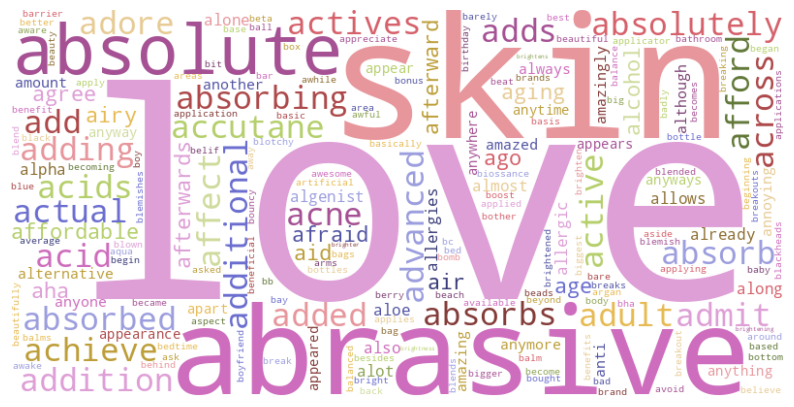

In [103]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="tab20b").generate_from_frequencies(tfidf_scores)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3.3 NLP: Sentiment Analysis (GloVe)

In [279]:
# To speed up the process Randomly sample 100,000 rows from df_reviews
sampled_df = df_reviews.sample(n=100000, random_state=42)

We decided to take a random sample for compututional speed as we have 1 million rows.

### 3.3.1 Reviews Preprocessing

In [280]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Assuming sampled_df is your DataFrame with columns "review_text" and "text_prcessed"
# Replace 'text' with 'review_text' in the following code

sampled_df["review_text"] = sampled_df["review_text"].str.lower()

sampled_df["text_prcessed"] = sampled_df["review_text"].replace('', ' ', regex=True)

sampled_df["text_prcessed"] = sampled_df["text_prcessed"].replace('[^\w\d\s]', ' ', regex=True)

tokenized_reviews = [word_tokenize(review) for review in sampled_df["text_prcessed"]]

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words
for indx, tokens in enumerate(tokenized_reviews):
    tokenized_reviews[indx] = [word for word in tokens if word not in stop_words]

# Replace the 'text' column with 'review_text' in the DataFrame
sampled_df["tokenized"] = tokenized_reviews


<>:15: DeprecationWarning:

invalid escape sequence '\w'

<>:15: DeprecationWarning:

invalid escape sequence '\w'

/var/tmp/ipykernel_4017/602130497.py:15: DeprecationWarning:

invalid escape sequence '\w'

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Then we did some cleaning and tokenized our reviews.

In [281]:
df_reviews.head()

author_id  rating  total_feedback_count  total_neg_feedback_count  \
0   1741593524       5                     2                         0   
1  31423088263       1                     0                         0   
2   5061282401       5                     0                         0   
3   6083038851       5                     0                         0   
4  47056667835       5                     0                         0   

   total_pos_feedback_count submission_time  \
0                         2      2023-02-01   
1                         0      2023-03-21   
2                         0      2023-03-21   
3                         0      2023-03-20   
4                         0      2023-03-20   

                                         review_text  \
0  I use this with the Nudestix “Citrus Clean Bal...   
1  I bought this lip mask after reading the revie...   
2  My review title says it all! I get so excited ...   
3  I’ve always loved this formula for a long time...   
4  If you have dry cracked lips, this is a must h...   

                       review_title skin_tone eye_color    skin_type  \
0  Taught me how to double cleanse!   Unknown     brown          dry   
1                      Disappointed   Unknown   Unknown      Unknown   
2              New Favorite Routine     light     brown          dry   
3   Can't go wrong with any of them   Unknown     brown  combination   
4                   A must have !!!     light     hazel  combination   

  hair_color product_id                                       product_name  \
0      black    P504322                     Gentle Hydra-Gel Face Cleanser   
1    Unknown    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
2     blonde    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
3      black    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   
4    Unknown    P420652  Lip Sleeping Mask Intense Hydration with Vitam...   

  brand_name  price_usd  
0   NUDESTIX       19.0  
1    LANEIGE       24.0  
2    LANEIGE       24.0  
3    LANEIGE       24.0  
4    LANEIGE       24.0

### 3.3.2 Vectorization

In [107]:
! pip install gensim

In [108]:
import gensim.downloader as api
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Either build your own model (pros and cons?)
# model_word2vec = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=2) # negative=50 , epochs=50, vector_size=300
# model_word2vec = model_word2vec.wv

# Or load a pre-trained model (pros and cons?)
# Load the Google News Word2Vec model
model_word2vec = api.load('glove-wiki-gigaword-50') # glove-wiki-gigaword-50 #word2vec-google-news-300

In [109]:
import nltk
nltk.download('punkt')

def get_word_embedding(word, model):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)


embeddings = []
for review in tokenized_reviews:
  review_embeddings = [get_word_embedding(word, model_word2vec) for word in review ]
  review_embedding = np.mean(review_embeddings if len(review_embeddings) >0 else [np.zeros(model_word2vec.vector_size)], axis=0)
  embeddings = embeddings + [review_embedding]

embeddings = np.array(embeddings)

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
embeddings.shape

(100000, 50)

We decided to use the Google News word2vec model as it is trained on a wider dataset and might derive more meaning from our reviews.

### 3.3.3 Sentiment Scores

In [111]:
ideal_pos = ["fantastic", "love", "amazing", "nice", "beautiful", "like", "good"]
ideal_neg = ["boring", "terrible", "bad", "hate", "disappointed", "sucks"]

In [112]:
test_sentence = word_tokenize("I tried this new skincare product at Sephora. It was a really good one.") #df["tokenized"].iloc[4]


In [113]:
model_word2vec.n_similarity(test_sentence, ideal_pos)


0.79207426

In [114]:
model_word2vec.n_similarity(test_sentence, ideal_neg)


0.6407813

Then, we created ideal positive and negagive vectors and tested it with a made up review.

In [282]:
def sentiment(review):
    return model_word2vec.n_similarity(review, ideal_pos) - model_word2vec.n_similarity(review, ideal_neg)

# Assuming you have already defined model_word2vec and ideal_pos, ideal_neg

# Apply the sentiment function to each row of the DataFrame
sampled_df["sentiment_score"] = sampled_df["tokenized"].apply(sentiment)

# Now, df_reviews["sentiment_score"] contains the sentiment scores for each review_text


We then calculated sentiment scores and added it to the dataframe.  We now need to determine a threshold to assign a positive or negative sentiment. In order to do so, we will split the dataset and observe the distribution of the sentiment scores.

In [283]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sampled_df['tokenized'], sampled_df['price_usd'], test_size=0.2, random_state=42)

In [284]:
sentiment_score_train = X_train.apply(lambda x: sentiment(x))


<Axes: >

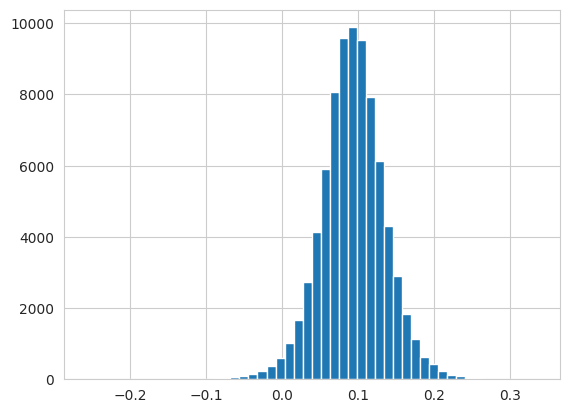

In [285]:
sentiment_score_train.hist(bins=50)


In [286]:
#only take that as threshold if nice normal dist if not look at hist to pick
train_mean = sentiment_score_train.mean()
train_mean

0.09283468

In [287]:
y_pred = X_test.apply(lambda x: sentiment(x)) > train_mean

In [288]:
y_pred

73420     False
523718    False
7053       True
100852     True
67551      True
          ...  
65015      True
348927     True
10392     False
76196      True
414218    False
Name: tokenized, Length: 20000, dtype: bool

<Axes: >

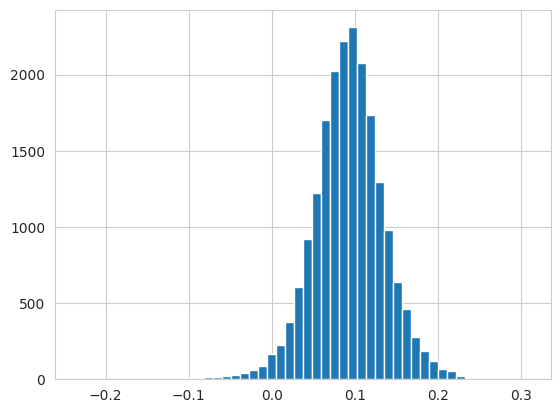

In [122]:
sentiment_score_test = X_test.apply(lambda x: sentiment(x))
sentiment_score_test.hist(bins=50)

Given that the distribution of the sentiment scores is similar to a normal distribution, we decided to use the mean as our threshold. Now that we have found that our threshold can be the mean, let's use it to assign positive or negative sentiments.

In [289]:
threshold=sampled_df['sentiment_score'].mean()
threshold

0.0927371

In [290]:
# Define your threshold
threshold = threshold  # Adjust the threshold as needed

# Function to assign sentiment labels
def assign_sentiment(sentiment_score):
    if sentiment_score > threshold:
        return "Positive"
    else:
        return "Negative"

# Apply the function to each row of the DataFrame
sampled_df["sentiment_label"] = sampled_df["sentiment_score"].apply(assign_sentiment)


### 3.3.4 Testing (with some positive negative and neutral reviews)

In [291]:
# Select 1 positive, 1 negative, and 1 neutral review
positive_review = sampled_df[sampled_df["sentiment_label"] == "Positive"].head(2)
negative_review = sampled_df[sampled_df["sentiment_label"] == "Negative"].head(2)

# Print out the reviews, sentiment scores, and labels
print("Positive Review:")
for idx, row in positive_review.iterrows():
    print("Review:", row["review_text"])
    print("Sentiment Score:", row["sentiment_score"])
    print("Sentiment Label:", row["sentiment_label"])
    print()

print("Negative Review:")
for idx, row in negative_review.iterrows():
    print("Review:", row["review_text"])
    print("Sentiment Score:", row["sentiment_score"])
    print("Sentiment Label:", row["sentiment_label"])
    print()


Positive Review:
Review: i have been loving all the products so far they make my face feel amazinggggg!!!!! i will definitely be buying more no mater the prices!!!! my skin deserves it! i received this complimentary from @influenster @dr.barbara thank you the combo is absolutely worth it!
Sentiment Score: 0.09945303201675415
Sentiment Label: Positive

Review: i love this mask! so soothing! makes my skin so smooth!
Sentiment Score: 0.15465039014816284
Sentiment Label: Positive

Negative Review:
Review: i have used 2 bottles of this product and it did absolutely nothing. it was waste of money for me
Sentiment Score: 0.029178321361541748
Sentiment Label: Negative

Review: i love this product, i feel like it really calms down my redness and my skin has felt much softer and has a better texture as well.
Sentiment Score: 0.05624741315841675
Sentiment Label: Negative



We then tested if our labels are right by printing out some reviews and looking at their sentiment. This showed that our labels are accurate for positive reviews but sometimes it flags negative reviews as positive. This may be because our ideal negative vector does not include an exhaustive list of words that would imply a negative sentiment. Although it is not perfect, it labels most reviews correctly, so we decided to proceed with that labelling.

### 3.3.5 Visualizations and Interpretations

Sentiment score distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



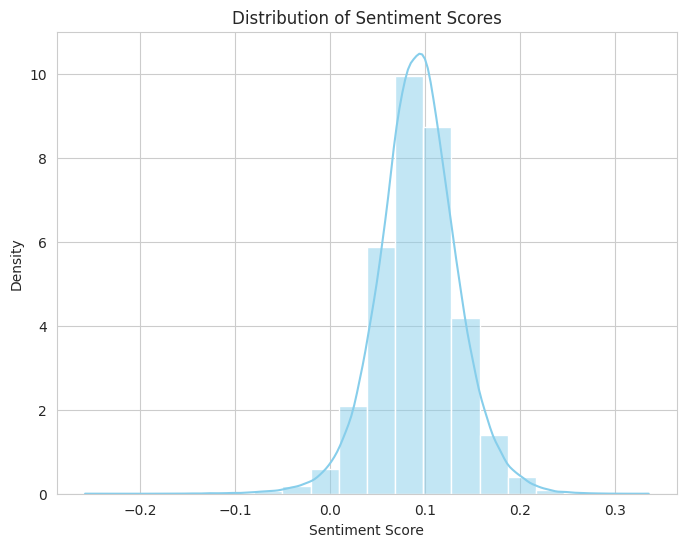

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(sampled_df["sentiment_score"], bins=20, kde=True, color="skyblue", stat="density")
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.show()

The sentiment scores are similar to a normal distribution.

Sentiment Scores Trend

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be remove

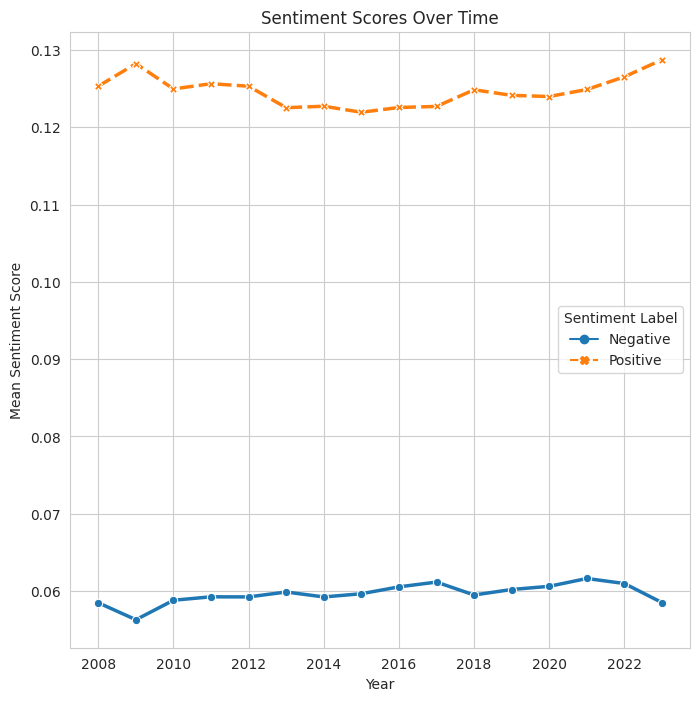

In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'submission_time' to datetime format
sampled_df['submission_time'] = pd.to_datetime(sampled_df['submission_time'])

# Extract year from 'submission_time'
sampled_df['year'] = sampled_df['submission_time'].dt.year

# Group by year and sentiment_label, and calculate the mean sentiment score
df_sentiment_year = sampled_df.groupby(['year', 'sentiment_label'])['sentiment_score'].mean().reset_index()

# Pivot the dataframe to have sentiment labels as columns
df_sentiment_pivot = df_sentiment_year.pivot(index='year', columns='sentiment_label', values='sentiment_score')

# Plot line chart
plt.figure(figsize=(8, 8))
sns.lineplot(data=df_sentiment_pivot, markers=True, linewidth=2.5)
plt.title('Sentiment Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Sentiment Score')
plt.legend(title='Sentiment Label')
plt.show()


We then wanted to see how sentiment scores have evolved over the years to see if there is a trend.It seems that the positive sentiment scores have decreased up until 2017, and then they steadily increased. This means that there has been more positive reviews over the years.

The negative sentiment scores have increased from 2008 to 2022. This may be a bit concerning for Sephora. But those results should be innterpreted with caution because the sentiment scores are just estimates and they are not perfect as mentionned above.

Common themes in positive and negative reviews

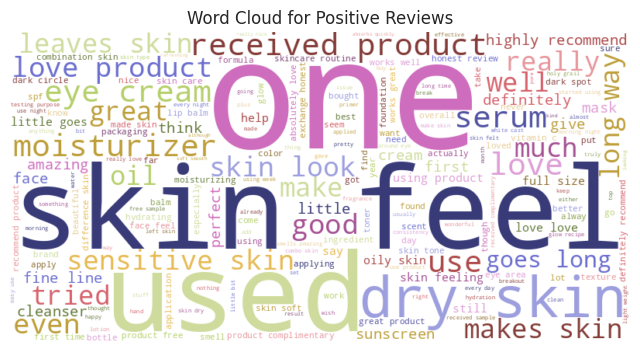

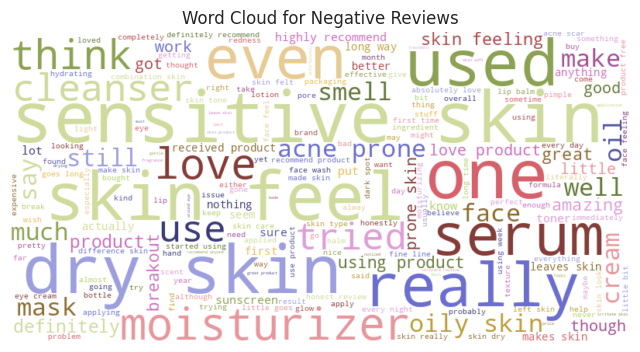

In [294]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = sampled_df[sampled_df['sentiment_label'] == 'Positive']['tokenized']
negative_reviews = sampled_df[sampled_df['sentiment_label'] == 'Negative']['tokenized']

# Join tokenized words into strings for word cloud generation
positive_text = ' '.join([' '.join(tokens) for tokens in positive_reviews])
negative_text = ' '.join([' '.join(tokens) for tokens in negative_reviews])

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white',colormap="tab20b").generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white',colormap="tab20b").generate(negative_text)


# Plot word clouds for positive reviews
plt.figure(figsize=(8, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Plot word clouds for negative reviews
plt.figure(figsize=(8, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()


We also thought that it would be interesting to look at common themes in positive and negative reviews.It seems that most reviews are for skincare products. Additionally, most customers seem to discuss issues or good feedback about the effects of the products on their skin. This signals that Sephora should focus more on their skincare category by ensuring that the needs of all skin types are met.

Relationships between Sentiment Scores and numerical features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



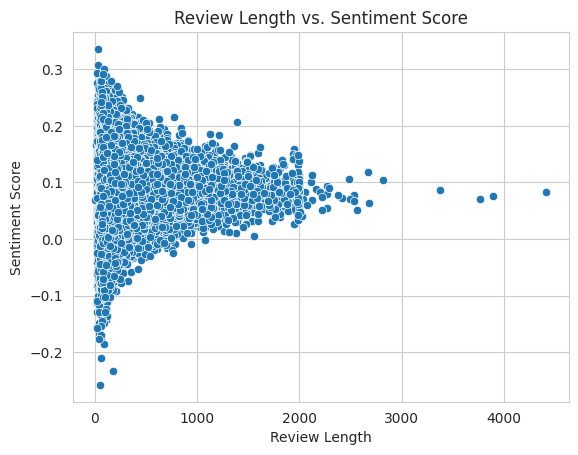

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



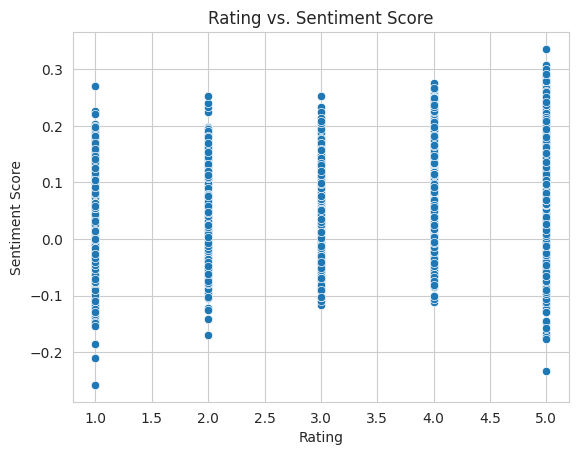

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



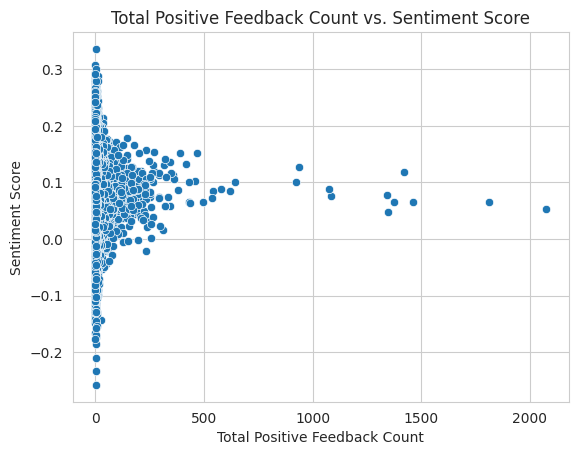

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



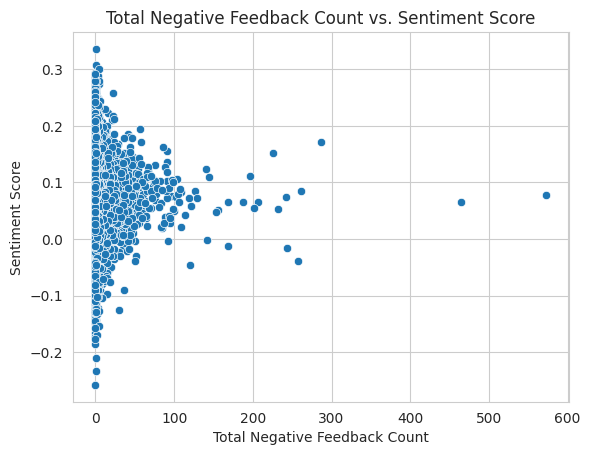

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



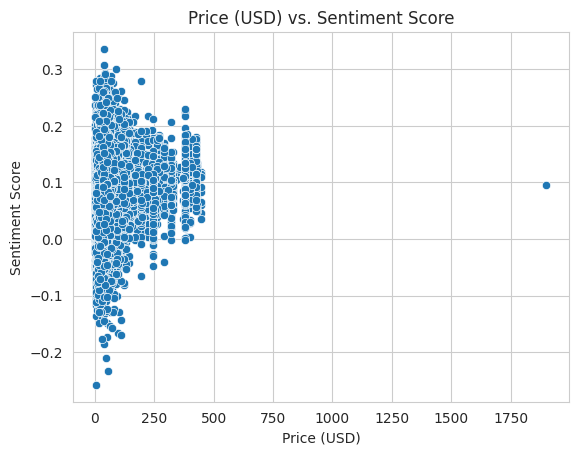

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Review Length vs. Sentiment Score
sns.scatterplot(data=sampled_df, x=sampled_df['review_text'].str.len(), y=sampled_df['sentiment_score'])
plt.title('Review Length vs. Sentiment Score')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.show()

# Scatter plot: Rating vs. Sentiment Score
sns.scatterplot(data=sampled_df, x=sampled_df['rating'], y=sampled_df['sentiment_score'])
plt.title('Rating vs. Sentiment Score')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.show()

# Scatter plot: Total Positive Feedback Count vs. Sentiment Score
sns.scatterplot(data=sampled_df, x=sampled_df['total_pos_feedback_count'], y=sampled_df['sentiment_score'])
plt.title('Total Positive Feedback Count vs. Sentiment Score')
plt.xlabel('Total Positive Feedback Count')
plt.ylabel('Sentiment Score')
plt.show()

# Scatter plot: Total Negative Feedback Count vs. Sentiment Score
sns.scatterplot(data=sampled_df, x=sampled_df['total_neg_feedback_count'], y=sampled_df['sentiment_score'])
plt.title('Total Negative Feedback Count vs. Sentiment Score')
plt.xlabel('Total Negative Feedback Count')
plt.ylabel('Sentiment Score')
plt.show()

# Scatter plot: Price (USD) vs. Sentiment Score
sns.scatterplot(data=sampled_df, x=sampled_df['price_usd'], y=sampled_df['sentiment_score'])
plt.title('Price (USD) vs. Sentiment Score')
plt.xlabel('Price (USD)')
plt.ylabel('Sentiment Score')
plt.show()


Then, we decided to explore whether there is a correlation between sentiment scores and other numerical variables such as price and ratings. The graphs were not very interpretable so we decided to make a heatmap for ease of interpretation.

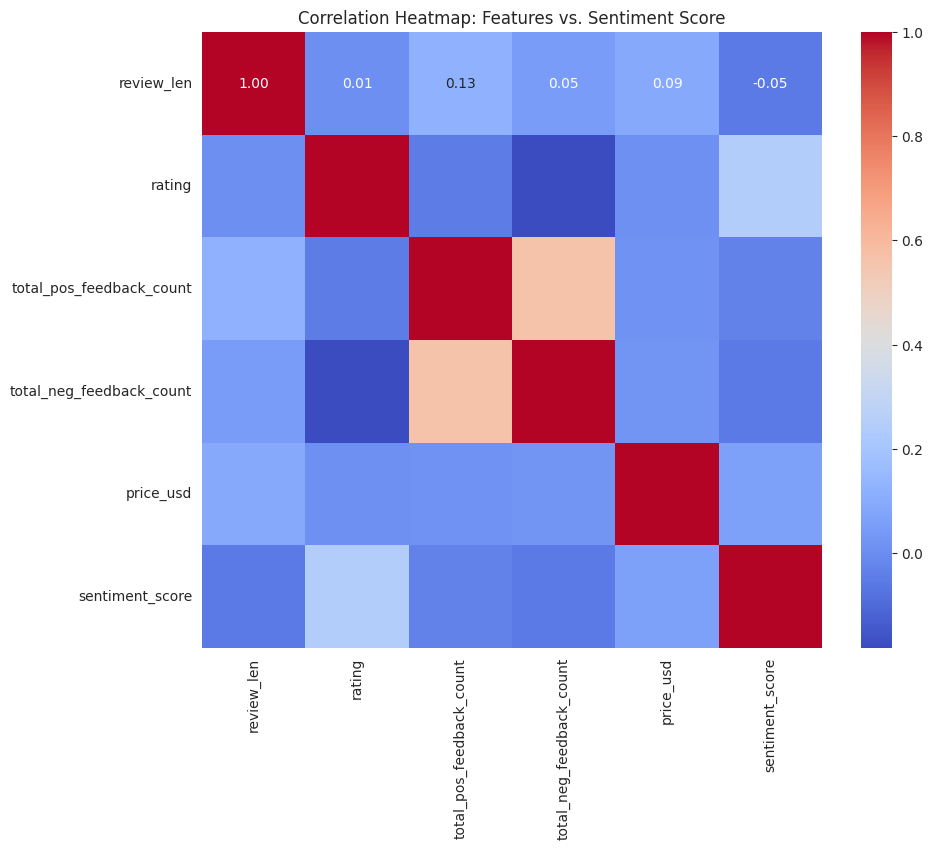

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new column for review length
sampled_df['review_len'] = sampled_df['review_text'].str.len()

# Select the columns of interest
columns_of_interest = ['review_len', 'rating', 'total_pos_feedback_count', 'total_neg_feedback_count', 'price_usd', 'sentiment_score']

# Create a correlation matrix
correlation_matrix = sampled_df[columns_of_interest].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Features vs. Sentiment Score')
plt.show()


The heatmap shows that the most correlated features with sentiment score are rating and price. However those are low correlation. Therefore, we can conclude that since the sentiment scores are estimates, the results are not surprising.

Sentiment score by skin tone

<Figure size 1000x600 with 0 Axes>

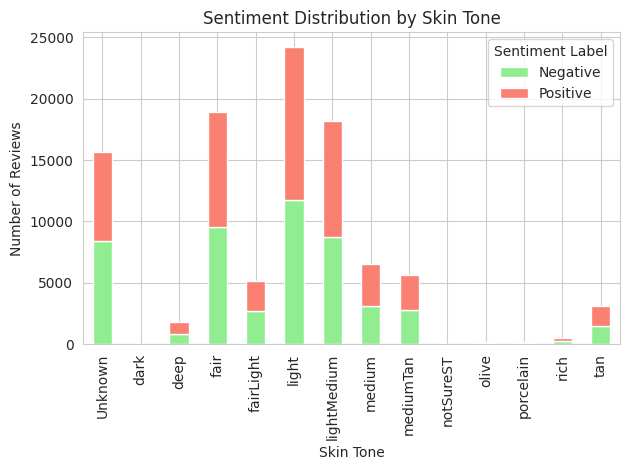

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by skin_tone and sentiment_label, and count the number of reviews
grouped_df = sampled_df.groupby(['skin_tone', 'sentiment_label']).size().unstack(fill_value=0)

# Plot bar graph
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Sentiment Distribution by Skin Tone')
plt.xlabel('Skin Tone')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()


Given that Sephora has received a lot of consumer backlash for a lack of representation in their product lines, we thought that it would be insightful to investigate how the sentiments are distributed across different skin tones and skin types.

Most skin tones' sentiments are evenly split. However, it seems that some skin tones do not have enough reviews to appear on the graph,as a result of our random sampling so it might be interesting to run an analysis on the 1M rows if we have more computational power.

Sentiment score by skin type

<Figure size 1000x600 with 0 Axes>

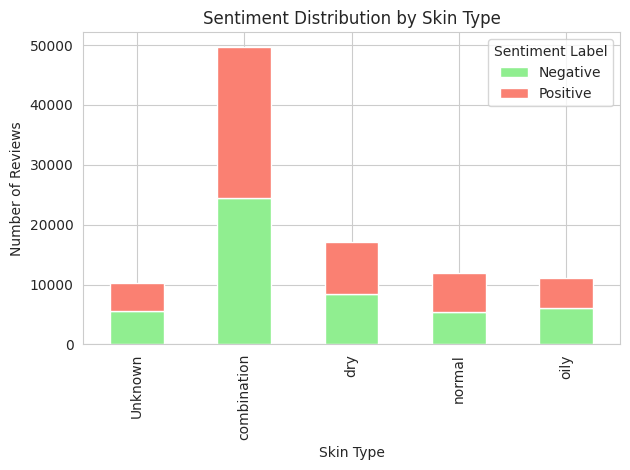

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by skin_type and sentiment_label, and count the number of reviews
grouped_df = sampled_df.groupby(['skin_type', 'sentiment_label']).size().unstack(fill_value=0)

# Plot bar graph
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Sentiment Distribution by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()


The graph shows again that most skin types have an equal number of positive and negative reviews which means that Sephora is doing a good job at serving different market segments with their skincare products.

Sentiment distribution for top 10 products

/var/tmp/ipykernel_4017/3610327841.py:31: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



<Figure size 1000x800 with 0 Axes>

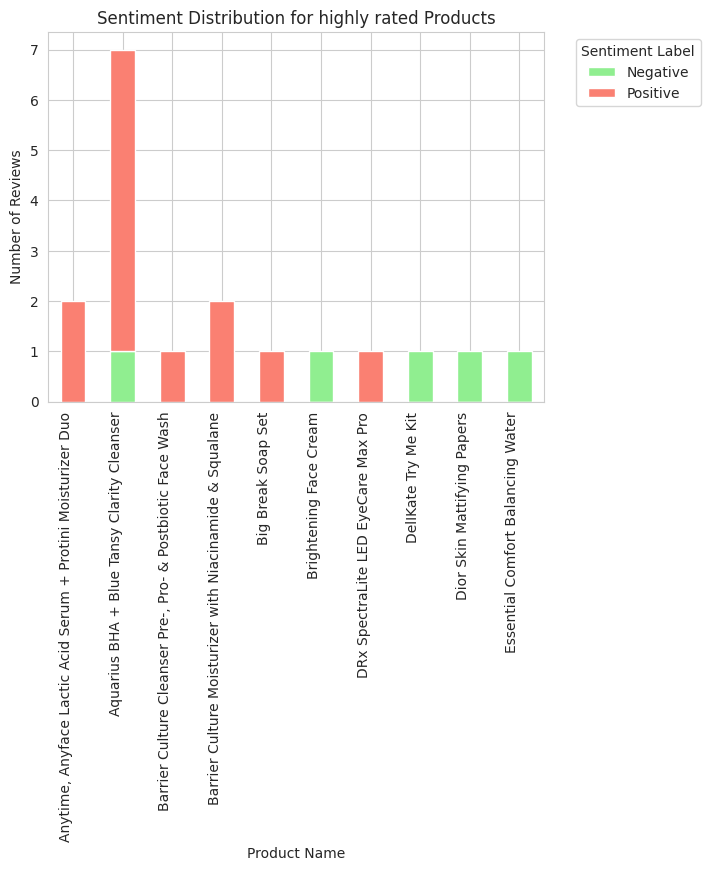

In [298]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge sampled_df with df_products to get product information
merged_df = pd.merge(sampled_df, df_products[['product_id', 'product_name', 'rating']], on='product_id', how='inner')

# Remove one product_name column
merged_df.drop(columns=['product_name_y'], inplace=True)

# Rename the remaining product_name column
merged_df.rename(columns={'product_name_x': 'product_name'}, inplace=True)

# Sort the merged_df by rating column in descending order and select the top 10 products
top_products = merged_df.groupby('product_name')['rating_y'].mean().nlargest(10).index

# Subset merged_df to include only the top 10 products
merged_df = merged_df[merged_df['product_name'].isin(top_products)]

# Group by product_name and sentiment label, and count the number of reviews
grouped_df = merged_df.groupby(['product_name', 'sentiment_label']).size().unstack(fill_value=0)

# Plot bar graph
plt.figure(figsize=(10, 8))
grouped_df.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Sentiment Distribution for highly rated Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.legend(title='Sentiment Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


After that, we decided to investigate how customers feel about some products and brands. In order to make the visualizations interpretable, we only focused on highly and lowly rated products and brands.
For the top 10 products it seems that some products such as the Dior Skin Papers have only negative reviews while others have only positive reviews. The Aquarius Cleanser seem to have more  positive than negative reviews.

In [134]:
merged_df.product_name.nunique()

10

Sentiment distribution for bottom 10 products

/var/tmp/ipykernel_4017/2813752367.py:31: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



<Figure size 1000x800 with 0 Axes>

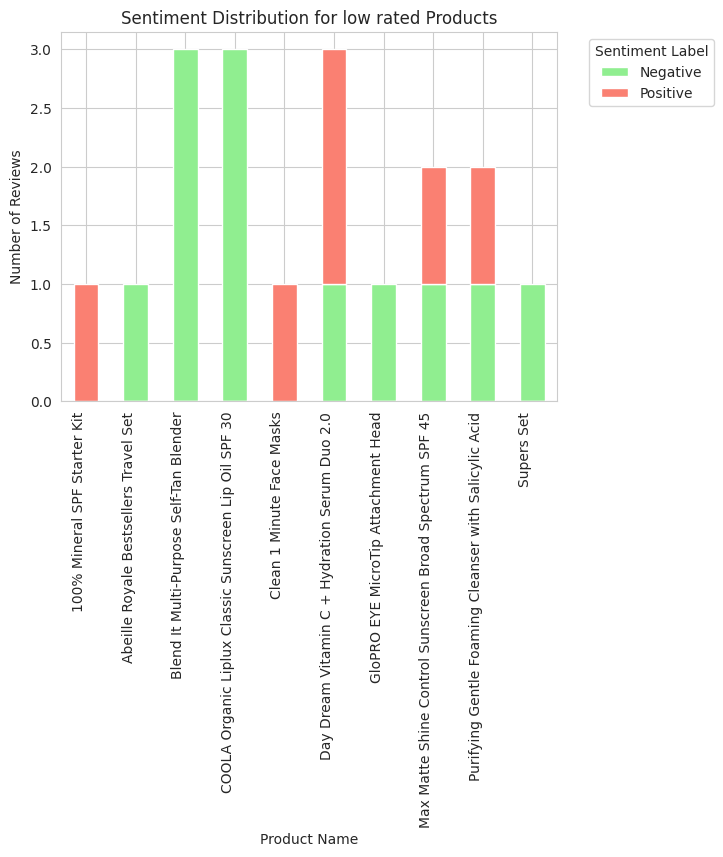

In [299]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge sampled_df with df_products to get product information
merged_df = pd.merge(sampled_df, df_products[['product_id', 'product_name', 'rating']], on='product_id', how='inner')

# Remove one product_name column
merged_df.drop(columns=['product_name_y'], inplace=True)

# Rename the remaining product_name column
merged_df.rename(columns={'product_name_x': 'product_name'}, inplace=True)

# Sort the merged_df by rating column in ascending order and select the bottom 10 products
bottom_products = merged_df.groupby('product_name')['rating_y'].mean().nsmallest(10).index

# Subset merged_df to include only the bottom 10 products
merged_df = merged_df[merged_df['product_name'].isin(bottom_products)]

# Group by product_name and sentiment label, and count the number of reviews
grouped_df = merged_df.groupby(['product_name', 'sentiment_label']).size().unstack(fill_value=0)

# Plot bar graph
plt.figure(figsize=(10, 8))
grouped_df.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Sentiment Distribution for low rated Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.legend(title='Sentiment Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The bottom 10 products have more negative reviews

Top products by positive reviews

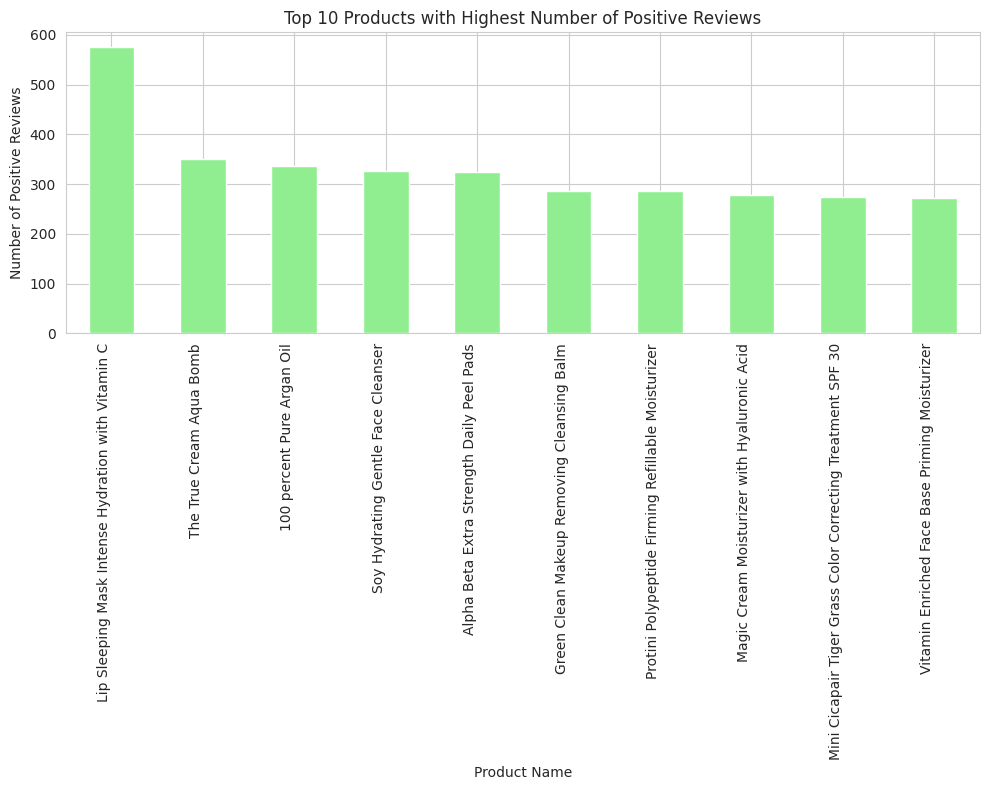

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge sampled_df with df_products to get product information
merged_df = pd.merge(sampled_df, df_products[['product_id', 'product_name', 'rating']], on='product_id', how='inner')

# Remove one product_name column
merged_df.drop(columns=['product_name_y'], inplace=True)

# Rename the remaining product_name column
merged_df.rename(columns={'product_name_x': 'product_name'}, inplace=True)

# Group by product_name and sentiment label, and count the number of positive reviews
positive_reviews = merged_df[merged_df['sentiment_label'] == 'Positive']
grouped_df = positive_reviews.groupby('product_name').size().nlargest(10)

# Plot bar graph
plt.figure(figsize=(10, 8))
grouped_df.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Products with Highest Number of Positive Reviews')
plt.xlabel('Product Name')
plt.ylabel('Number of Positive Reviews')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


The products with the highest positive reviews seem to mostly be skincare products.

Top products by negative reviews

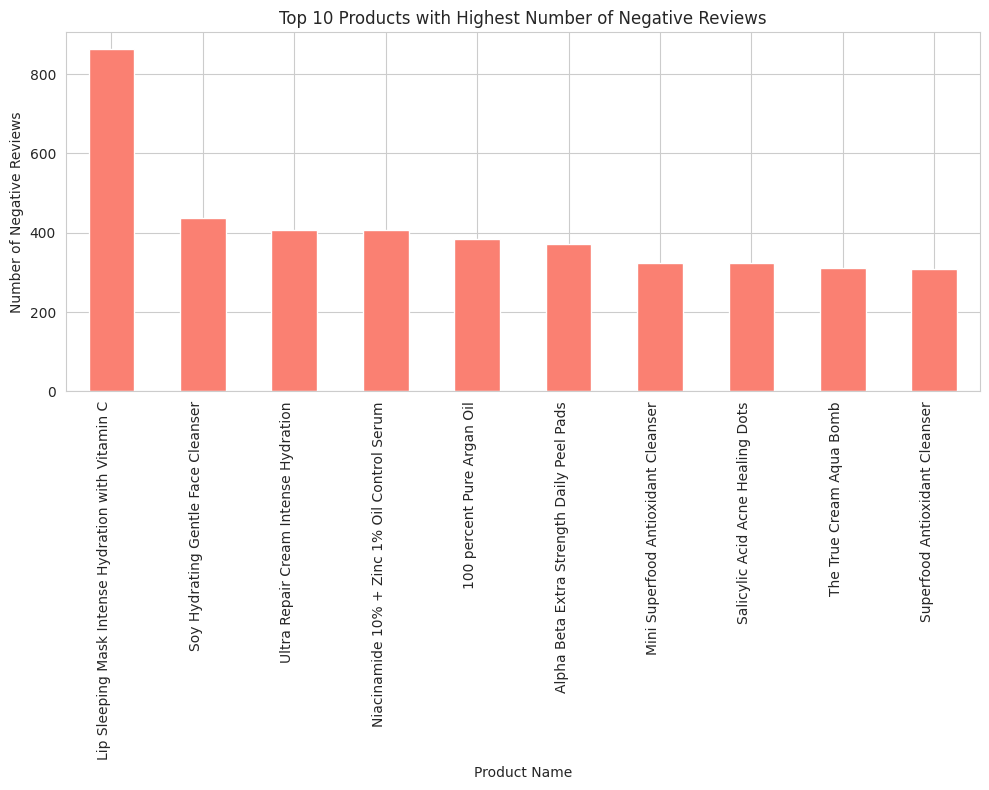

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge sampled_df with df_products to get product information
merged_df = pd.merge(sampled_df, df_products[['product_id', 'product_name', 'rating']], on='product_id', how='inner')

# Remove one product_name column
merged_df.drop(columns=['product_name_y'], inplace=True)

# Rename the remaining product_name column
merged_df.rename(columns={'product_name_x': 'product_name'}, inplace=True)

# Group by product_name and sentiment label, and count the number of negative reviews
negative_reviews = merged_df[merged_df['sentiment_label'] == 'Negative']
grouped_df = negative_reviews.groupby('product_name').size().nlargest(10)

# Plot bar graph
plt.figure(figsize=(10, 8))
grouped_df.plot(kind='bar', color='salmon')
plt.title('Top 10 Products with Highest Number of Negative Reviews')
plt.xlabel('Product Name')
plt.ylabel('Number of Negative Reviews')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


This also shows mostly skincare products. It is interesting to note that some products such as argan oil and the lip sleeping mask appear both as products with a high number of positive and negative reviews. This should be investigated as customers seem to be conflicted about the product.

As expected, most lowly rated products only have negative reviews.

Sentiment distribution for top 10 brands

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


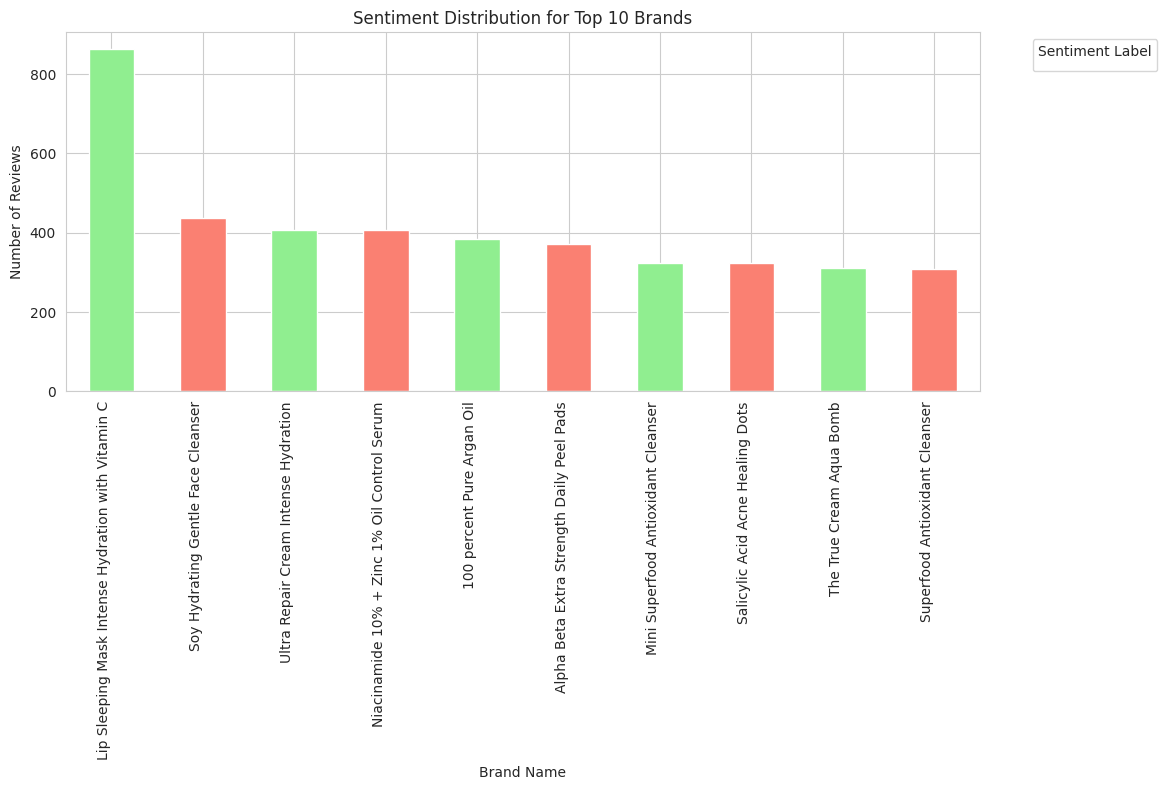

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge sampled_df with df_products to get product information
merged_df = pd.merge(sampled_df, df_products[['product_id', 'brand_name', 'rating']], on='product_id', how='inner')

# Remove one brand_name column
merged_df.drop(columns=['brand_name_y'], inplace=True)

# Rename the remaining brand_name column
merged_df.rename(columns={'brand_name_x': 'brand_name'}, inplace=True)

# Sort the merged_df by rating column in ascending order and select the bottom 10 brands
bottom_brands = merged_df.groupby('brand_name')['rating_y'].mean().nlargest(10).index

# Subset merged_df to include only the bottom 10 brands
merged_df = merged_df[merged_df['brand_name'].isin(bottom_brands)]

# Group by brand_name and sentiment label, and count the number of reviews
grouped_df_top = merged_df.groupby(['brand_name', 'sentiment_label']).size().unstack(fill_value=0)

# Plot bar graph
plt.figure(figsize=(10, 8))
grouped_df.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Sentiment Distribution for Top 10 Brands')
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.legend(title='Sentiment Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



The bar graph shows that most brands have again an even split between positive and negative reviews.

Sentiment distribution for bottom 10 brands

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


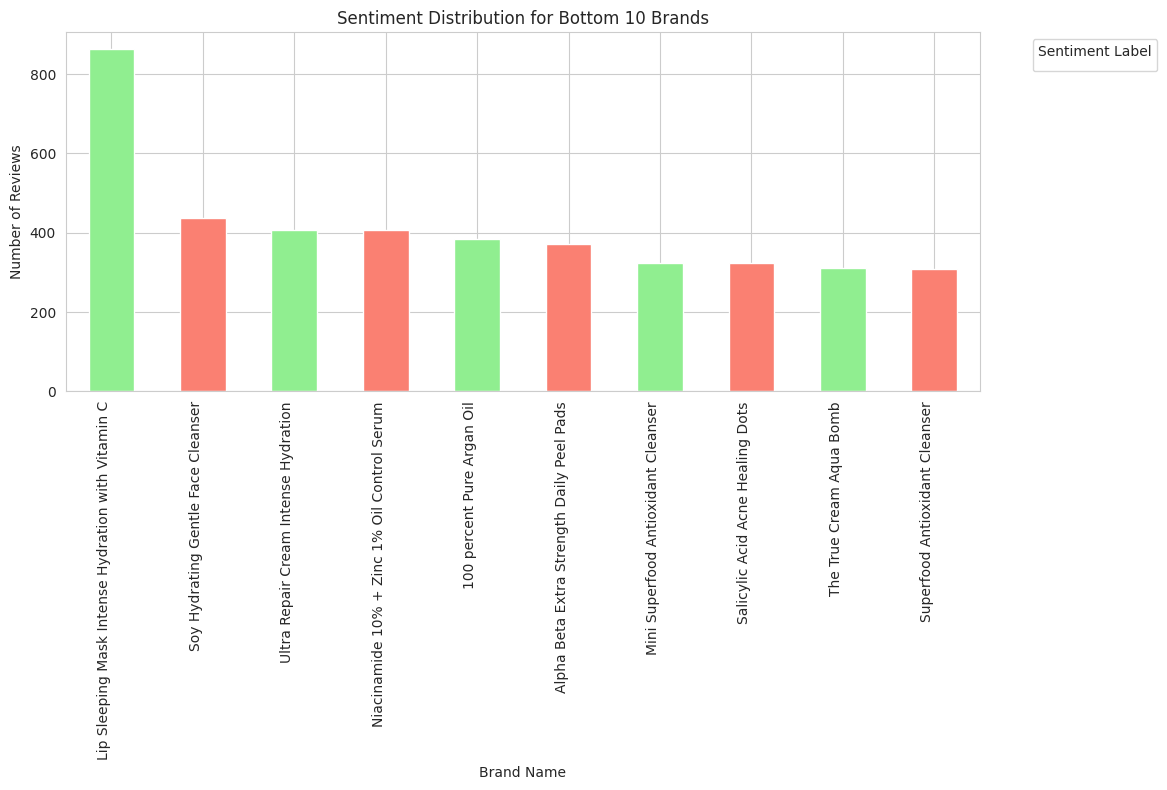

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge sampled_df with df_products to get product information
merged_df = pd.merge(sampled_df, df_products[['product_id', 'brand_name', 'rating']], on='product_id', how='inner')

# Remove one brand_name column
merged_df.drop(columns=['brand_name_y'], inplace=True)

# Rename the remaining brand_name column
merged_df.rename(columns={'brand_name_x': 'brand_name'}, inplace=True)

# Sort the merged_df by rating column in ascending order and select the bottom 10 brands
bottom_brands = merged_df.groupby('brand_name')['rating_y'].mean().nsmallest(10).index

# Subset merged_df to include only the bottom 10 brands
merged_df = merged_df[merged_df['brand_name'].isin(bottom_brands)]

# Group by brand_name and sentiment label, and count the number of reviews
grouped_df_bottom = merged_df.groupby(['brand_name', 'sentiment_label']).size().unstack(fill_value=0)

# Plot bar graph
plt.figure(figsize=(10, 8))
grouped_df.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Sentiment Distribution for Bottom 10 Brands')
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.legend(title='Sentiment Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



As expected most lowly rated brands except Isle of Paradise have a high number of negative reviews.

3.3.5 Reviews Clustering

After the sentiment analysis, we thought that it would be nice to cluster reviews to see if the sentiment socres influence the way reviews are grouped.

3.3.5.1 Preprocessing

In [140]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for clustering
numerical_features = ['rating', 'total_feedback_count', 'total_neg_feedback_count',
                      'total_pos_feedback_count', 'price_usd', 'sentiment_score']

# Extract numerical features from sampled_df
X = sampled_df[numerical_features]

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


3.3.5.2 Kmeans clustering

Elbow Plot

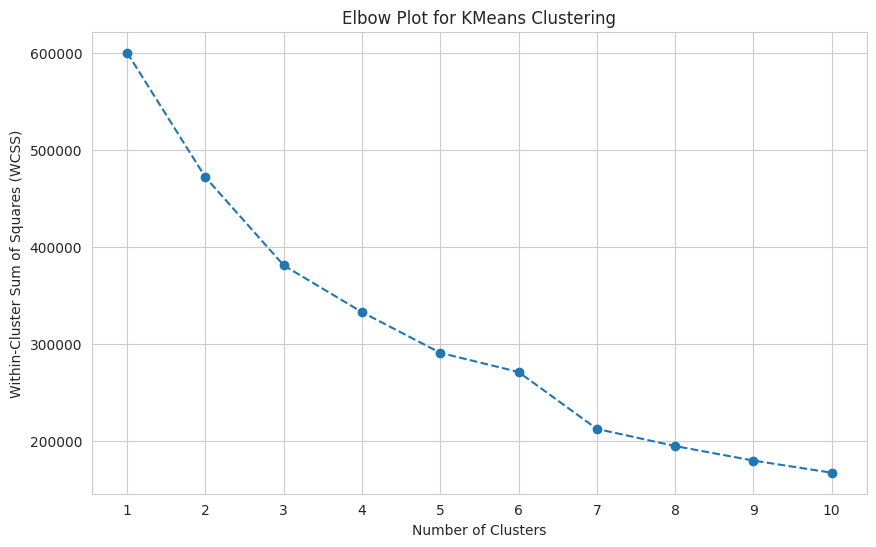

In [141]:
# Perform K-means clustering for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


Silhouette plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



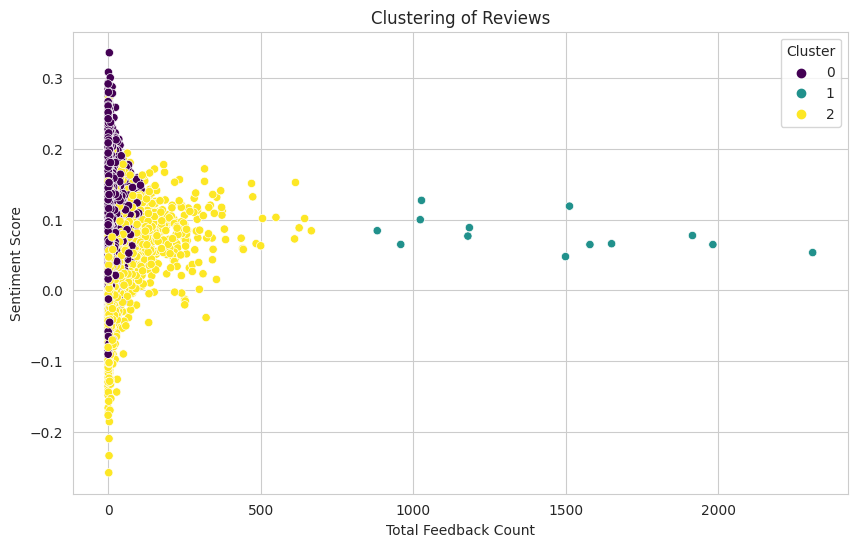

In [301]:

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
sampled_df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='total_feedback_count', y='sentiment_score', hue='cluster', palette='viridis')
plt.title('Clustering of Reviews')
plt.xlabel('Total Feedback Count')
plt.ylabel('Sentiment Score')
plt.legend(title='Cluster')
plt.show()

We chose a kmeans algorithm and determined the optimal number of clusters to be 3 as seen above in the elbow plot. The yellow and purple clusters seem to be a bit overlapping but the clustering is otherwise good.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be remove

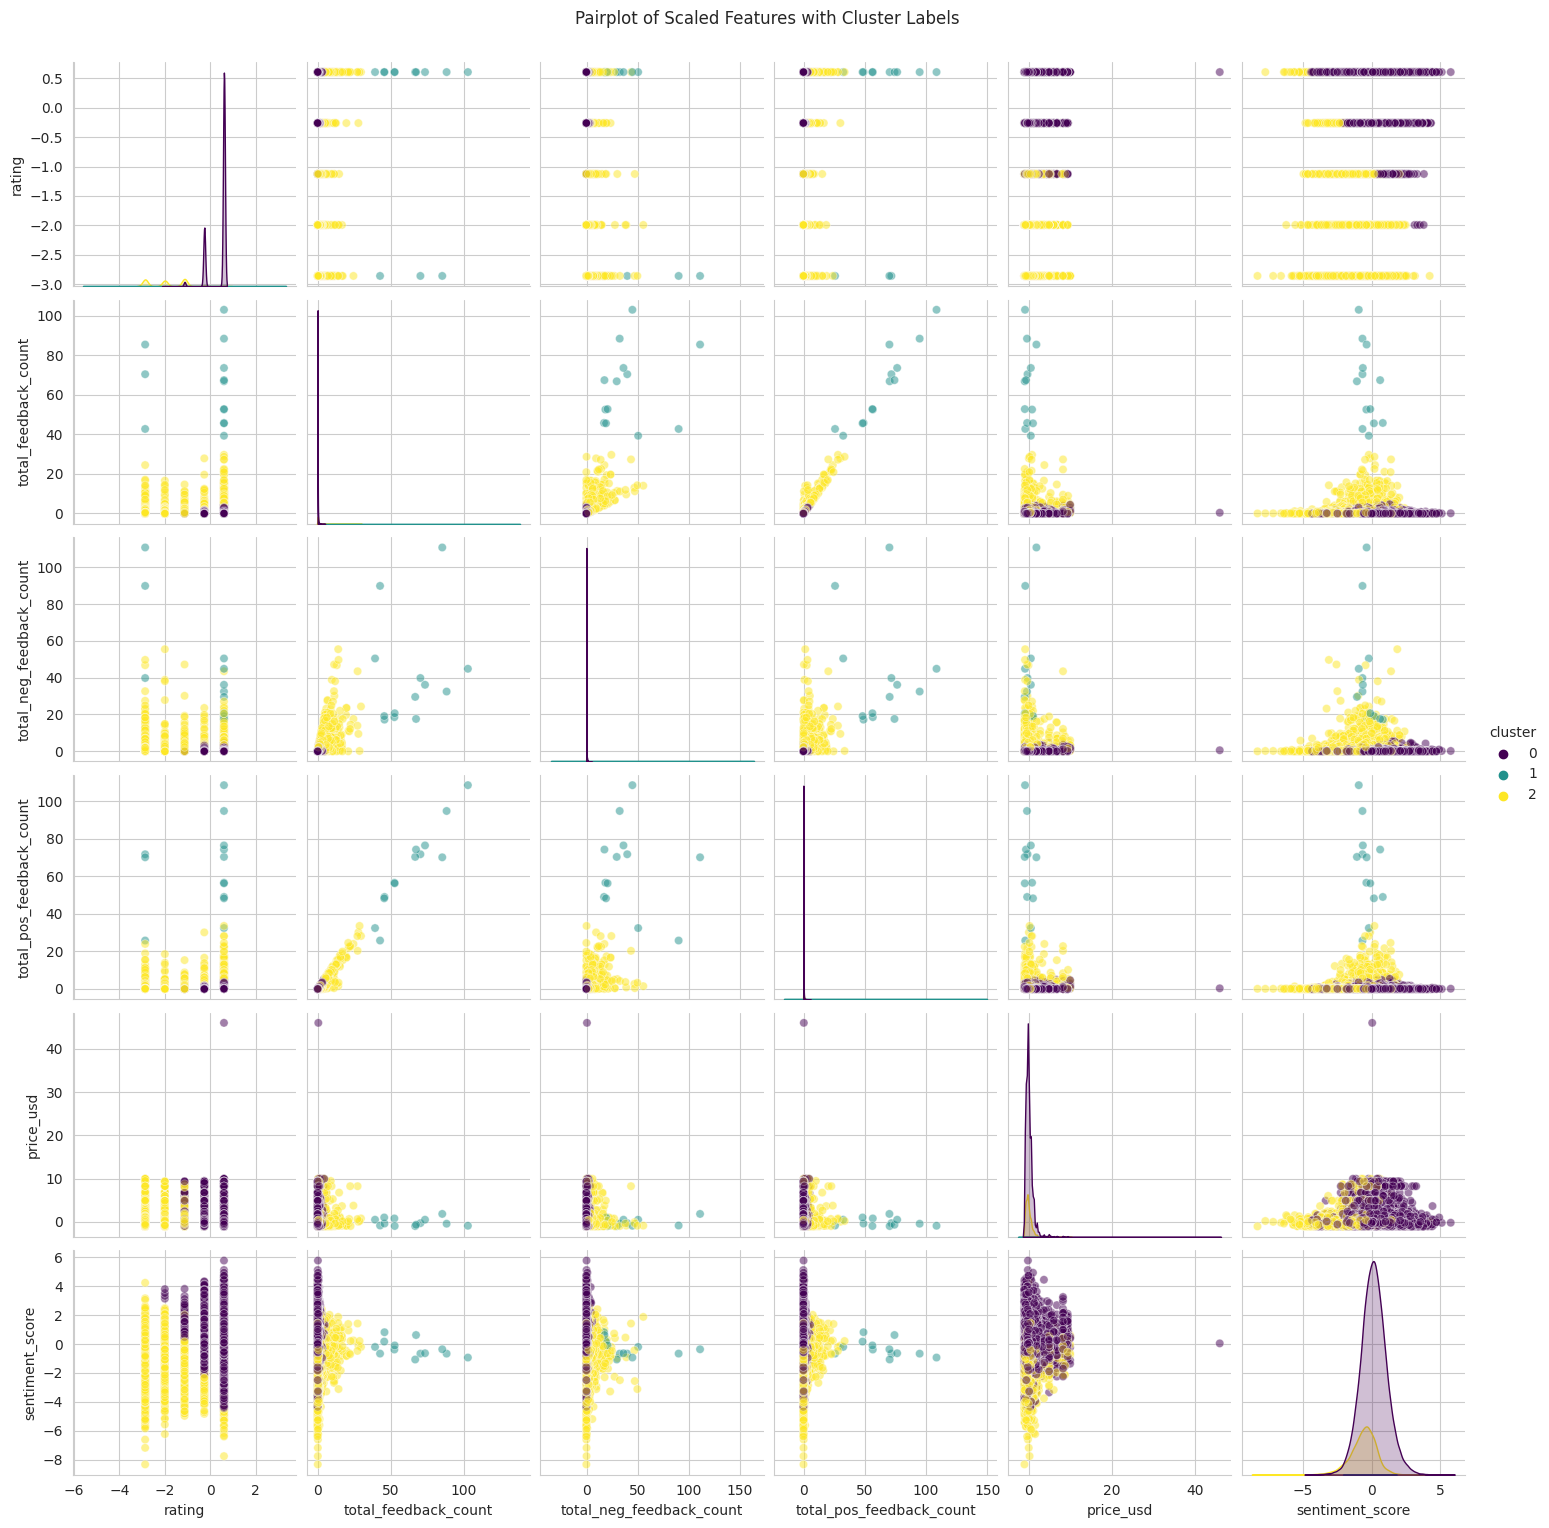

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

columns=['rating', 'total_feedback_count', 'total_neg_feedback_count',
                      'total_pos_feedback_count', 'price_usd', 'sentiment_score']

# Reset the index of sampled_df
sampled_df.reset_index(drop=True, inplace=True)

# Combine the scaled features with the cluster labels
cluster_data = pd.concat([pd.DataFrame(X_scaled, columns=columns), pd.DataFrame(sampled_df['cluster'], columns=['cluster'])], axis=1)

# Create a pairplot with cluster labels as hue
sns.pairplot(cluster_data, hue='cluster', palette='viridis', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Scaled Features with Cluster Labels', y=1.02)
plt.show();

The pairplot suggests that certain variables significantly influence the clustering, particularly those where the clusters are well-separated in the scatter plots. For instance:


1. `total_feedback_count` and `total_neg_feedback_count` show a clear separation between clusters, suggesting they have a strong influence on the clustering. Higher feedback counts seem to correspond to specific clusters, indicating these are important features for group differentiation.
2. `price_usd` also shows some degree of cluster separation, especially for higher-priced items, implying that price is a relevant factor for clustering.


3. `sentiment_score` has a noticeable overlap between clusters, suggesting it might not be as influential in defining cluster boundaries compared to feedback counts and price.


4. Variables where clusters are not distinctly separated, such as `sentiment_score` and `rating`, seem to have a lesser influence on clustering.


5. The distribution plots on the diagonal indicate the range and skewness of each variable within clusters, but they do not directly indicate how much each variable influences the clustering.


In summary, feedback-related variables and price seem to be strong influencers for the clusters, while sentiment score and rating show more overlap and might be less influential.

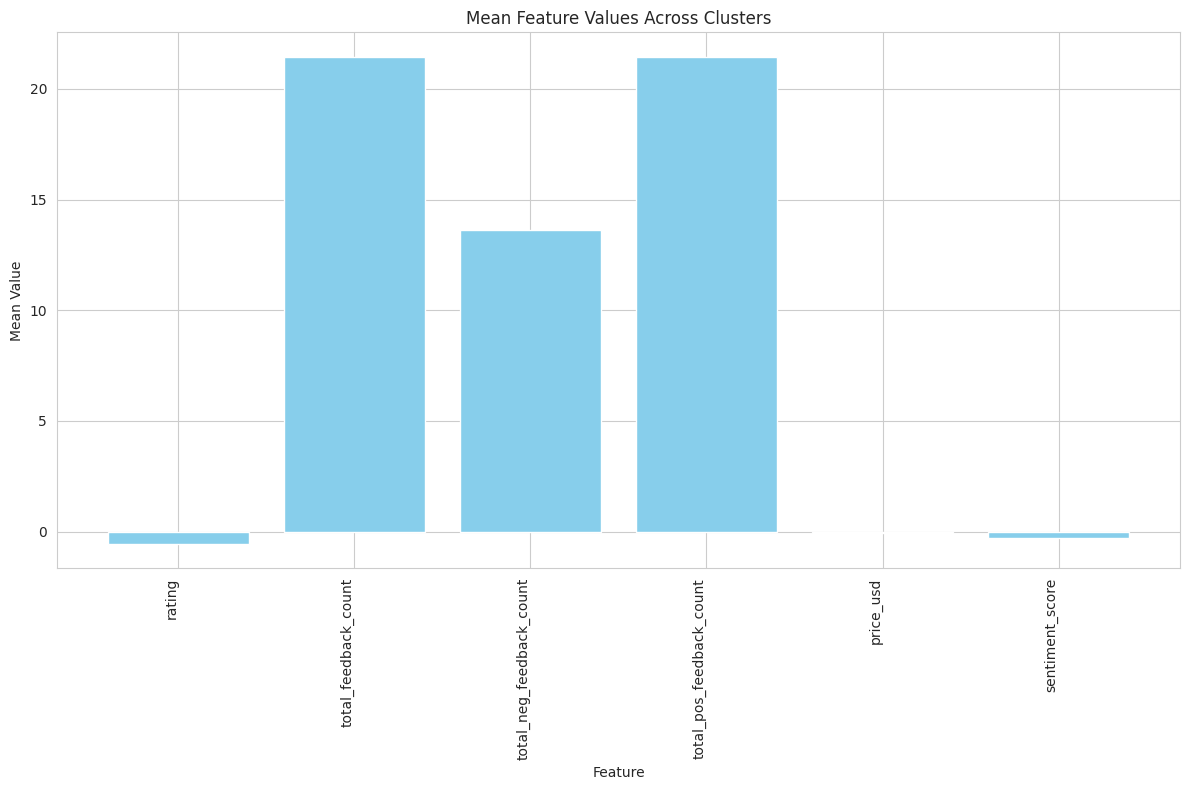

In [146]:
import numpy as np

# Get cluster centers from the trained KMeans model
cluster_centers = kmeans.cluster_centers_

# Calculate the mean of each feature across all clusters
mean_feature_values = np.mean(cluster_centers, axis=0)

# Plot bar graph
plt.figure(figsize=(12, 8))
plt.bar(columns, mean_feature_values, color='skyblue')
plt.title('Mean Feature Values Across Clusters')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show();

This graph shows that feedback counts seem to influence the clustering the most.The price also seem to have some influence.

## 3.4 Clustering: K-means

### 3.4.1 Elbow Plot

We wanted to investigate whether the different products in the products table (df_products) could be segregated into different clusters. To find the optimal number of clusters, we used the Elbow Plot. We chose to use the following numerical columns: 'rating', 'reviews' and 'price_usd' because we felt like these could be appropriate features for products to be clustered by.

100%|██████████| 9/9 [00:01<00:00,  6.05it/s]


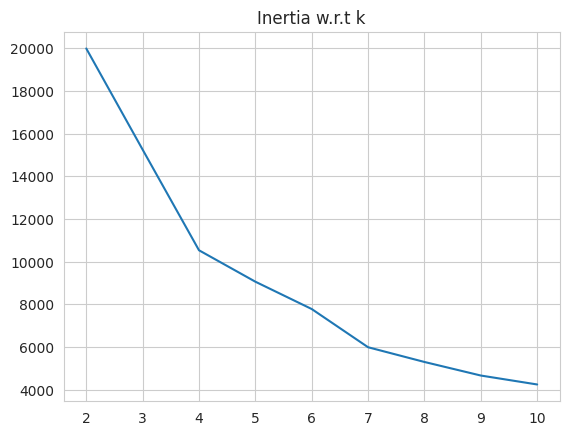

In [224]:
from sklearn.cluster import KMeans
from tqdm import tqdm
inertias= []

for k_ in tqdm (np.arange(2, 11)):
  kmeans_result = (KMeans(n_clusters=k_).fit(df_products[['rating', 'reviews', 'price_usd']]))
  inertias.append(kmeans_result.inertia_)
plt.plot(np.arange(2, 11), inertias, label = 'inertia')
plt.xticks(np.arange(2, 11))
plt.title('Inertia w.r.t k')
plt.show()

Based on the Elbow Plot, we decided to go with 4 as the optimal number of clusters as that is where the graph starts levelling off significantly. We then performed KMeans clustering, using k = 4.

In [225]:
from sklearn.cluster import KMeans
num_clusters = 4
kmeans_result = KMeans(num_clusters, init='random').fit(df_products[['rating', 'reviews', 'price_usd']])
kmeans_result.cluster_centers_

array([[ 0.21037777, -0.16812025,  2.41569257],
       [ 0.21443751,  5.19648244, -0.3290256 ],
       [-1.50405816, -0.2421017 , -0.33235024],
       [ 0.40027246, -0.06061435, -0.23681915]])

We then assigned each product to its specific cluster label and visualized the table to ensure that the labels were being reflected.

In [226]:
df_products['cluster_labels'] = kmeans_result.labels_
df_products

product_id                                       product_name  brand_id  \
0       P473671                            Fragrance Discovery Set      6342   
1       P473668                            La Habana Eau de Parfum      6342   
2       P473662                          Rainbow Bar Eau de Parfum      6342   
3       P473660                               Kasbah Eau de Parfum      6342   
4       P473658                          Purple Haze Eau de Parfum      6342   
...         ...                                                ...       ...   
8489    P467659                   Couture Clutch Eyeshadow Palette      1070   
8490    P500874                              L'Homme Eau de Parfum      1070   
8491    P504428                   Mon Paris Eau de Parfum Gift Set      1070   
8492    P504448                           Y Eau de Parfum Gift Set      1070   
8493    P505461  Candy Glaze Lip Gloss Stick Duo with Hyaluroni...      1070   

              brand_name  loves_count    rating   reviews  \
0                  19-69    -0.345922 -1.103939 -0.389166   
1                  19-69    -0.383642 -0.086285 -0.387326   
2                  19-69    -0.392327  0.102927 -0.384565   
3                  19-69    -0.395883  0.547831 -0.379965   
4                  19-69    -0.400830 -1.901697 -0.387326   
...                  ...          ...       ...       ...   
8489  Yves Saint Laurent    -0.399333  0.454208 -0.392847   
8490  Yves Saint Laurent    -0.406459  0.863512  0.112342   
8491  Yves Saint Laurent    -0.419229  1.578072 -0.397448   
8492  Yves Saint Laurent    -0.428837  0.180323 -0.399289   
8493  Yves Saint Laurent    -0.438627  0.180323 -0.399289   

                                            ingredients  price_usd  \
0     ['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...  -0.330210   
1     ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...   2.883911   
2     ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...   2.883911   
3     ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...   2.883911   
4     ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...   2.883911   
...                                                 ...        ...   
8489  ['Talc, Synthetic Fluorphlogopite, Triethylhex...   1.979939   
8490  ['Alcohol, Aqua / Water / Eau, Parfum / Fragra...   1.096056   
8491  ['Mon Paris Eau de Parfum:', 'Alcohol, Parfum/...   1.658527   
8492  ['Alcohol, Parfum/Fragrance, Aqua/Water, Limon...   2.321440   
8493  ['Diisostearyl Malate, Bis-Behenyl/Isostearyl/...  -0.028886   

      limited_edition  new  online_only  out_of_stock  sephora_exclusive  \
0                   0    0            1             0                  0   
1                   0    0            1             0                  0   
2                   0    0            1             0                  0   
3                   0    0            1             0                  0   
4                   0    0            1             0                  0   
...               ...  ...          ...           ...                ...   
8489                0    0            0             0                  0   
8490                0    0            0             0                  0   
8491                1    1            1             1                  0   
8492                1    1            1             0                  0   
8493                0    1            1             0                  1   

                                             highlights primary_category  \
0     ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...        Fragrance   
1     ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
2     ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
3     ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
4     ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
...                                                 ...              ...   
8489                     

In [227]:
df_products['cluster_labels'].value_counts()

cluster_labels
3    5809
2    1686
0     825
1     173
Name: count, dtype: int64

Checking the value counts for each cluster showed us that most products appeared to have been clustered into cluster 1, followed by cluster 2. Cluster 3 has the lowest number of products.

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_products, x = 'price_usd', y = 'rating', z='reviews', color = 'cluster_labels')
fig.update_traces(marker_size = 3)
fig.show()

Based on this, it appears as those the Yellow CLuster (Cluster 3) has the highest number of reviews. The Orange Cluster (Cluster 2) appears to have lower prices and lower ratings. The Blue Cluster (Cluster 0) appears to have the highest priced products, as well as the highest range of prices. The Purple Cluster (Cluster 1) appears to have a smaller spread of prices, but higher ratings. We investigated the cluster properties further below.

In [304]:
df_products_copy['cluster_labels'] = kmeans_result.labels_
df_products_copy

product_id                                       product_name  brand_id  \
0       P473671                            Fragrance Discovery Set      6342   
1       P473668                            La Habana Eau de Parfum      6342   
2       P473662                          Rainbow Bar Eau de Parfum      6342   
3       P473660                               Kasbah Eau de Parfum      6342   
4       P473658                          Purple Haze Eau de Parfum      6342   
...         ...                                                ...       ...   
8489    P467659                   Couture Clutch Eyeshadow Palette      1070   
8490    P500874                              L'Homme Eau de Parfum      1070   
8491    P504428                   Mon Paris Eau de Parfum Gift Set      1070   
8492    P504448                           Y Eau de Parfum Gift Set      1070   
8493    P505461  Candy Glaze Lip Gloss Stick Duo with Hyaluroni...      1070   

              brand_name  loves_count   rating  reviews  \
0                  19-69         6320  3.63640       11   
1                  19-69         3827  4.15380       13   
2                  19-69         3253  4.25000       16   
3                  19-69         3018  4.47620       21   
4                  19-69         2691  3.23080       13   
...                  ...          ...      ...      ...   
8489  Yves Saint Laurent         2790  4.42860        7   
8490  Yves Saint Laurent         2319  4.63670      556   
8491  Yves Saint Laurent         1475  5.00000        2   
8492  Yves Saint Laurent          840  4.28935        0   
8493  Yves Saint Laurent          193  4.28935        0   

                                            ingredients  price_usd  \
0     ['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...       35.0   
1     ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   
2     ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   
3     ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   
4     ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...      195.0   
...                                                 ...        ...   
8489  ['Talc, Synthetic Fluorphlogopite, Triethylhex...      150.0   
8490  ['Alcohol, Aqua / Water / Eau, Parfum / Fragra...      106.0   
8491  ['Mon Paris Eau de Parfum:', 'Alcohol, Parfum/...      134.0   
8492  ['Alcohol, Parfum/Fragrance, Aqua/Water, Limon...      167.0   
8493  ['Diisostearyl Malate, Bis-Behenyl/Isostearyl/...       50.0   

      limited_edition  new  online_only  out_of_stock  sephora_exclusive  \
0                   0    0            1             0                  0   
1                   0    0            1             0                  0   
2                   0    0            1             0                  0   
3                   0    0            1             0                  0   
4                   0    0            1             0                  0   
...               ...  ...          ...           ...                ...   
8489                0    0            0             0                  0   
8490                0    0            0             0                  0   
8491                1    1            1             1                  0   
8492                1    1            1             0                  0   
8493                0    1            1             0                  1   

                                             highlights primary_category  \
0     ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...        Fragrance   
1     ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
2     ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
3     ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
4     ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
...                                                 ...              ...   
8489                                            U

To investigate the properties of each cluster, we created subsets.

In [305]:
c0 = df_products_copy[df_products_copy['cluster_labels'] == 0]
c1 = df_products_copy[df_products_copy['cluster_labels'] == 1]
c2 = df_products_copy[df_products_copy['cluster_labels'] == 2]
c3 = df_products_copy[df_products_copy['cluster_labels'] == 3]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be remove

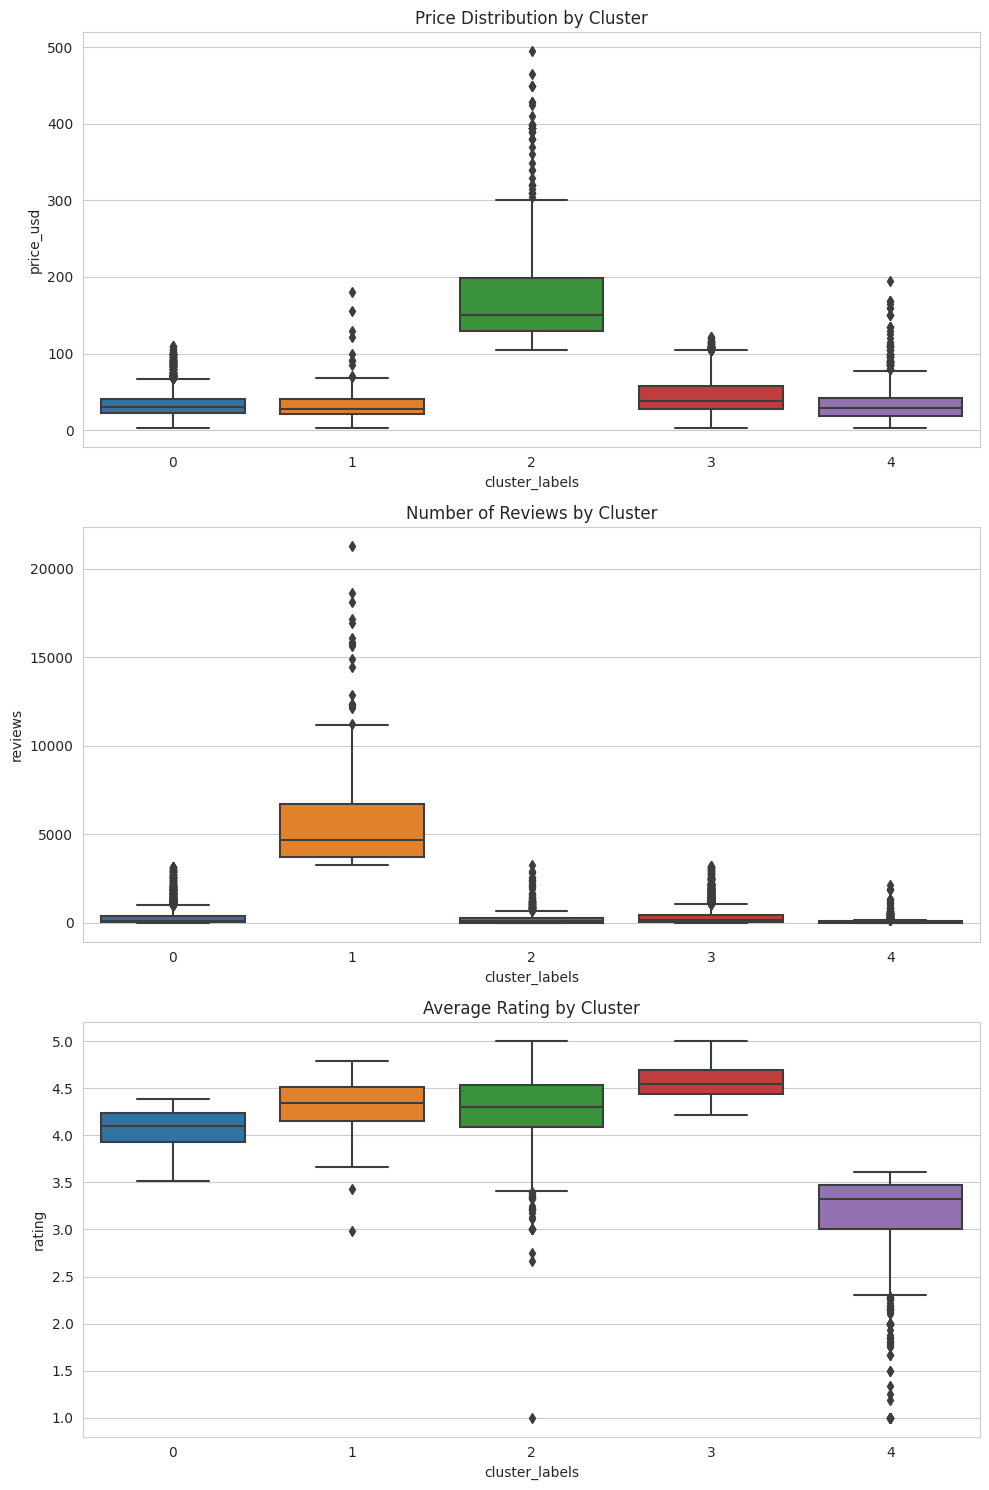

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot price_usd
sns.boxplot(x='cluster_labels', y='price_usd', data=df_products_copy, ax=axes[0])
axes[0].set_title('Price Distribution by Cluster')

# Plot number of reviews
sns.boxplot(x='cluster_labels', y='reviews', data=df_products_copy, ax=axes[1])
axes[1].set_title('Number of Reviews by Cluster')

# Plot average rating
sns.boxplot(x='cluster_labels', y='rating', data=df_products_copy, ax=axes[2])
axes[2].set_title('Average Rating by Cluster')

plt.tight_layout()
plt.show()

In [307]:
import plotly.express as px

# Compute the counts for each combination of cluster label and primary category
category_counts = df_products_copy.groupby(['cluster_labels', 'primary_category']).size().reset_index(name='count')

# Create the bar chart using the 'Antique' color palette
fig = px.bar(category_counts, x='cluster_labels', y='count', color='primary_category',
             title='Distribution of Products in Categories',
             color_discrete_sequence=px.colors.qualitative.Antique)

# Update the layout with a larger figure size and centered title
fig.update_layout(
    xaxis_title='Cluster Labels',
    yaxis_title='Count of Products',
    legend_title='Primary Category',
    barmode='group',
    width=1200,
    height=600, 
    title_x=0.5 
)

# Show the plot
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Cluster 0 has mostly fragrances, and the distribution of categories is not spread out, compared to Clusters 1 and 2. The minimum price for products in this cluster was higher than the average prices for each of the other clusters. Again, this makes sense, because the dominant primary category is fragrances, which tend to have higher prices. The ratings for products in this cluster were pretty high, with the average rating being around 4.3.

Cluster 1 had a high number of products in it, so it can explain why Cluster 1 also has the widest range of ratings out of all the clusters. Interestingly, products in this cluster had the lowest number of reviews on average, and also the lowest price on average. This also makes sense, because more people can afford to buy cheaper products. Cluster 1 also has a good distribution of the different categories of products. Because these products are cheaper, it's possible that they consist of a range of mixed quality ingredients, which again could reflect the range of different ratings.

Cluster 2 had the highest number of products by far, and taking a closer look at the distribution of primary categories for the products in this cluster, we can see that it has products from all 9 categories. The price range is surprisingly not too spread out, which makes us think that perhaps this cluster contains products across all the categories that are relatively mid-price. It also has the lowest range of average ratings - from 3.8 to 5, which is pretty decent.

Cluster 3 had the lowest number of products and not evenly spread out across the different primary categories. This cluster also has the highest number of reviews.

We then decided to try the silhouette score to see if our results were any different from the Elbow Method.

### 3.4.2 Silhouette Visualization

100%|██████████| 9/9 [00:10<00:00,  1.20s/it]


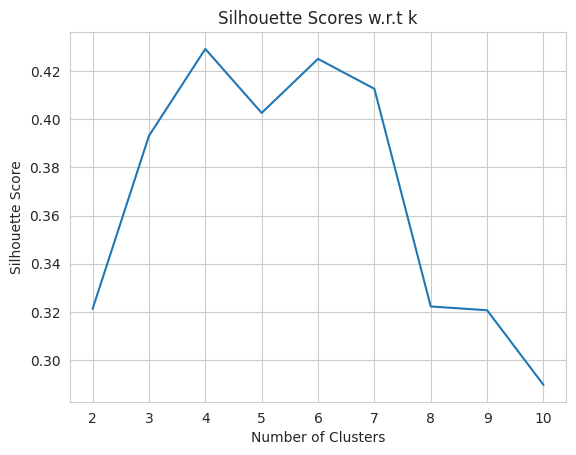

In [233]:
from tqdm import tqdm
from sklearn.metrics import silhouette_score
inertias= []
sil_scores = []
for k_ in tqdm (np.arange(2, 11)):
  kmeans_result = (KMeans(n_clusters=k_, random_state=40).fit(df_products[['rating', 'reviews', 'price_usd']]))
  inertias.append(kmeans_result.inertia_)
  score = silhouette_score(df_products[['rating', 'reviews', 'price_usd']],
                           kmeans_result.labels_, metric='euclidean')
  sil_scores.append(score)
plt.plot(np.arange(2, 11), sil_scores, label = 'silhouette score')
plt.xticks(np.arange(2, 11))
plt.title('Silhouette Scores w.r.t k')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [234]:
from sklearn.cluster import KMeans
num_clusters = 5
kmeans_result = KMeans(num_clusters, init='random').fit(df_products[['rating', 'reviews', 'price_usd']])
kmeans_result.cluster_centers_

array([[-0.2627542 , -0.08575102, -0.34030427],
       [ 0.21443751,  5.19648244, -0.3290256 ],
       [ 0.16303355, -0.1659381 ,  2.51576263],
       [ 0.75487927, -0.06131525, -0.14258534],
       [-2.08442785, -0.31571975, -0.30148913]])

In [235]:
df_products['cluster_labels_2']=kmeans_result.labels_
df_products

product_id                                       product_name  brand_id  \
0       P473671                            Fragrance Discovery Set      6342   
1       P473668                            La Habana Eau de Parfum      6342   
2       P473662                          Rainbow Bar Eau de Parfum      6342   
3       P473660                               Kasbah Eau de Parfum      6342   
4       P473658                          Purple Haze Eau de Parfum      6342   
...         ...                                                ...       ...   
8489    P467659                   Couture Clutch Eyeshadow Palette      1070   
8490    P500874                              L'Homme Eau de Parfum      1070   
8491    P504428                   Mon Paris Eau de Parfum Gift Set      1070   
8492    P504448                           Y Eau de Parfum Gift Set      1070   
8493    P505461  Candy Glaze Lip Gloss Stick Duo with Hyaluroni...      1070   

              brand_name  loves_count    rating   reviews  \
0                  19-69    -0.345922 -1.103939 -0.389166   
1                  19-69    -0.383642 -0.086285 -0.387326   
2                  19-69    -0.392327  0.102927 -0.384565   
3                  19-69    -0.395883  0.547831 -0.379965   
4                  19-69    -0.400830 -1.901697 -0.387326   
...                  ...          ...       ...       ...   
8489  Yves Saint Laurent    -0.399333  0.454208 -0.392847   
8490  Yves Saint Laurent    -0.406459  0.863512  0.112342   
8491  Yves Saint Laurent    -0.419229  1.578072 -0.397448   
8492  Yves Saint Laurent    -0.428837  0.180323 -0.399289   
8493  Yves Saint Laurent    -0.438627  0.180323 -0.399289   

                                            ingredients  price_usd  \
0     ['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...  -0.330210   
1     ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...   2.883911   
2     ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...   2.883911   
3     ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...   2.883911   
4     ['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...   2.883911   
...                                                 ...        ...   
8489  ['Talc, Synthetic Fluorphlogopite, Triethylhex...   1.979939   
8490  ['Alcohol, Aqua / Water / Eau, Parfum / Fragra...   1.096056   
8491  ['Mon Paris Eau de Parfum:', 'Alcohol, Parfum/...   1.658527   
8492  ['Alcohol, Parfum/Fragrance, Aqua/Water, Limon...   2.321440   
8493  ['Diisostearyl Malate, Bis-Behenyl/Isostearyl/...  -0.028886   

      limited_edition  ...  online_only  out_of_stock  sephora_exclusive  \
0                   0  ...            1             0                  0   
1                   0  ...            1             0                  0   
2                   0  ...            1             0                  0   
3                   0  ...            1             0                  0   
4                   0  ...            1             0                  0   
...               ...  ...          ...           ...                ...   
8489                0  ...            0             0                  0   
8490                0  ...            0             0                  0   
8491                1  ...            1             1                  0   
8492                1  ...            1             0                  0   
8493                0  ...            1             0                  1   

                                             highlights primary_category  \
0     ['Unisex/ Genderless Scent', 'Warm &Spicy Scen...        Fragrance   
1     ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
2     ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
3     ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
4     ['Unisex/ Genderless Scent', 'Layerable Scent'...        Fragrance   
...                                                 ...              ...   
8489                     

In [236]:
df_products['cluster_labels_2'].value_counts()

cluster_labels_2
3    3409
0    3245
4     903
2     763
1     173
Name: count, dtype: int64

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_products, x = 'price_usd', y = 'rating', z='reviews', color = 'cluster_labels_2')
fig.update_traces(marker_size = 3)
fig.show()

Based on this, it appears as the Blue Cluster has products with the highest range of reviews. In comparison, Pink Cluster had the lowest range of reviews as well as the lowest range of prices. We can clearly see that the Orange CLuster is not spread out in terms of price, but appears to be priced higher on average than the purple Cluster, which also appears to have the fewest datapoints. Products in the Yellow cluster appear to have lower prices but higher ratings.

Note: The plotly graphs are not rendering in the Vertex AI Environment, so we are adding screenshots to the Report Appendix to show what they would look like. The first screenshot (Figure 14) represents the cluster visualizations using the optimal number of clusters suggested by the Elbow Method (4). The second screenshot (Figure 15) represents the cluster visualizations using the optimal number of clusters suggested by the Silhouette Score (5). The third screenshot (Figure 16) is an interactive graph showing the distribution of product categories across the clusters.

## 4.0 Conclusion

The comprehensive analysis conducted on Sephora's product and review data has provided valuable insights into customer preferences, product trends, and sentiment towards Sephora's offerings. Through meticulous data cleaning and preprocessing, we ensured the integrity and quality of our dataset, enabling robust analysis. Exploratory Data Analysis (EDA) revealed significant variability in product features and highlighted the diversity of Sephora's product range. Moreover, insights into brand popularity, category distribution, and pricing strategies shed light on Sephora's competitive landscape and customer satisfaction levels.
The subsequent analysis utilizing Market Basket Analysis, Natural Language Processing (NLP), and clustering techniques unveiled deeper patterns and relationships within the data. Market Basket Analysis identified strong associations between products, offering valuable insights for targeted recommendations and sales strategies. NLP enabled sentiment analysis, entity recognition, and topic extraction, providing a nuanced understanding of customer sentiments and preferences. Clustering facilitated the identification of product groups based on various attributes, aiding in product categorization and understanding customer preferences.
Despite encountering challenges such as computational limitations and data intricacies, our project successfully navigated these obstacles through adaptation and perseverance. Transitioning to the Google Cloud Platform enhanced computational efficiency, while collaborative challenges were overcome through continuous learning and adaptation.
Looking ahead, there are opportunities to further refine our analysis by incorporating domain-specific language nuances and implementing Named Entity Recognition (NER) for more granular insights. By continuously iterating and refining our approach, we aim to enhance the accuracy and relevance of our project outcomes, ultimately providing actionable insights for Sephora to optimize product offerings, customer engagement, and overall satisfaction.
In summary, this project has provided a comprehensive analysis of Sephora's product and review data, offering valuable insights and paving the way for further refinement and optimization in customer-centric strategies.